In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data_df = pd.read_excel('/content/drive/Othercomputers/내 노트북/Data_Scientist_3rd_Folder/Data_thon/real_estate_transaction_price_information_2024.xlsx')
data_df.head(3)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11215,광진구,10500,자양동,1.0,대지,695,0,한양,20241119,238000,157.870,0.0,2.0,NaN,NaN,1983.0,아파트,중개거래,서울 광진구
1,2024,11290,성북구,12000,동선동5가,1.0,대지,172,8,현대빌라,20241119,25500,56.730,29.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 성북구
2,2024,11545,금천구,10200,독산동,1.0,대지,1147,0,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,NaN,NaN,2016.0,아파트,직거래,NaN


In [ ]:
import pandas as pd
import numpy as np
import chardet

import chardet

import chardet

with open('/content/drive/Othercomputers/내 노트북/Data_Scientist_3rd_Folder/Data_thon/real_estate_transaction_price_information_2024.xlsx', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': None, 'confidence': 0.0, 'language': None}


In [ ]:
data_df.shape

(86558, 21)

In [ ]:
# 모든 열을 한 줄에 출력하도록 설정
pd.set_option('display.max_columns', None)  # 열 표시 개수 제한 해제
pd.set_option('display.width', 1000)        # 출력 너비를 넓게 설정

# 데이터 출력
data_df.head(3)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11215,광진구,10500,자양동,1.0,대지,695,0,한양,20241119,238000,157.870,0.0,2.0,NaN,NaN,1983.0,아파트,중개거래,서울 광진구
1,2024,11290,성북구,12000,동선동5가,1.0,대지,172,8,현대빌라,20241119,25500,56.730,29.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 성북구
2,2024,11545,금천구,10200,독산동,1.0,대지,1147,0,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,NaN,NaN,2016.0,아파트,직거래,NaN


In [ ]:
data_df = pd.DataFrame(data_df)
print(data_df)

       접수연도  자치구코드 자치구명  법정동코드   법정동명  지번구분 지번구분명    본번   부번           건물명       계약일  물건금액(만원)  건물면적(㎡)  토지면적(㎡)     층 권리구분         취소일    건축년도   건물용도  신고구분 신고한 개업공인중개사 시군구명
0      2024  11215  광진구  10500    자양동   1.0    대지   695    0            한양  20241119    238000  157.870    0.000   2.0  NaN         NaN  1983.0    아파트  중개거래           서울 광진구
1      2024  11290  성북구  12000  동선동5가   1.0    대지   172    8          현대빌라  20241119     25500   56.730   29.000   4.0  NaN         NaN  1994.0  연립다세대  중개거래           서울 성북구
2      2024  11545  금천구  10200    독산동   1.0    대지  1147    0  금천롯데캐슬골드파크1차  20241119    120000   84.811    0.000  26.0  NaN         NaN  2016.0    아파트   직거래              NaN
3      2024  11545  금천구  10300    시흥동   1.0    대지   828    4        현부스카이2  20241119     26700   50.015   72.711   7.0  NaN         NaN  2018.0   오피스텔  중개거래           서울 금천구
4      2024  11470  양천구  10200     목동   1.0    대지   128    8      아호가(我好家)  20241119     16000   14.950    9.000   4.0  NaN       

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_df_num= data_df.select_dtypes(exclude='object')


In [ ]:
data_df_num.head(3)

,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
0,2024,11215,10500,1.0,20241119,238000,157.870,0.0,2.0,NaN,1983.0
1,2024,11290,12000,1.0,20241119,25500,56.730,29.0,4.0,NaN,1994.0
2,2024,11545,10200,1.0,20241119,120000,84.811,0.0,26.0,NaN,2016.0


In [ ]:
data_df_num = data_df.select_dtypes(include=['number'])

In [ ]:
corr=data_df_num.corr()
corr['물건금액(만원)']

,물건금액(만원)
접수연도,NaN
자치구코드,0.167409
법정동코드,0.037181
지번구분,0.008717
계약일,0.020807
물건금액(만원),1.000000
건물면적(㎡),0.580557
토지면적(㎡),0.021156
층,0.328279
취소일,0.081424


In [ ]:
corr['물건금액(만원)'][abs(corr['물건금액(만원)'])>=0.5]

,물건금액(만원)
물건금액(만원),1.000000
건물면적(㎡),0.580557


In [ ]:
from matplotlib import font_manager

data_df_num

,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
0,2024,11215,10500,1.0,20241119,238000,157.870,0.000,2.0,NaN,1983.0
1,2024,11290,12000,1.0,20241119,25500,56.730,29.000,4.0,NaN,1994.0
2,2024,11545,10200,1.0,20241119,120000,84.811,0.000,26.0,NaN,2016.0
3,2024,11545,10300,1.0,20241119,26700,50.015,72.711,7.0,NaN,2018.0
4,2024,11470,10200,1.0,20241119,16000,14.950,9.000,4.0,NaN,2013.0
...,...,...,...,...,...,...,...,...,...,...,...
86553,2024,11530,10700,1.0,20220708,9190,53.610,124.000,1.0,20240207.0,1981.0
86554,2024,11530,10700,1.0,20220708,9190,53.610,124.000,1.0,20240207.0,1981.0
86555,2024,11530,10700,1.0,20220708,9740,53.610,124.000,2.0,20240207.0,1981.0
86556,2024,11440,11000,NaN,20210719,195000,157.450,116.700,NaN,20240417.0,1988.0


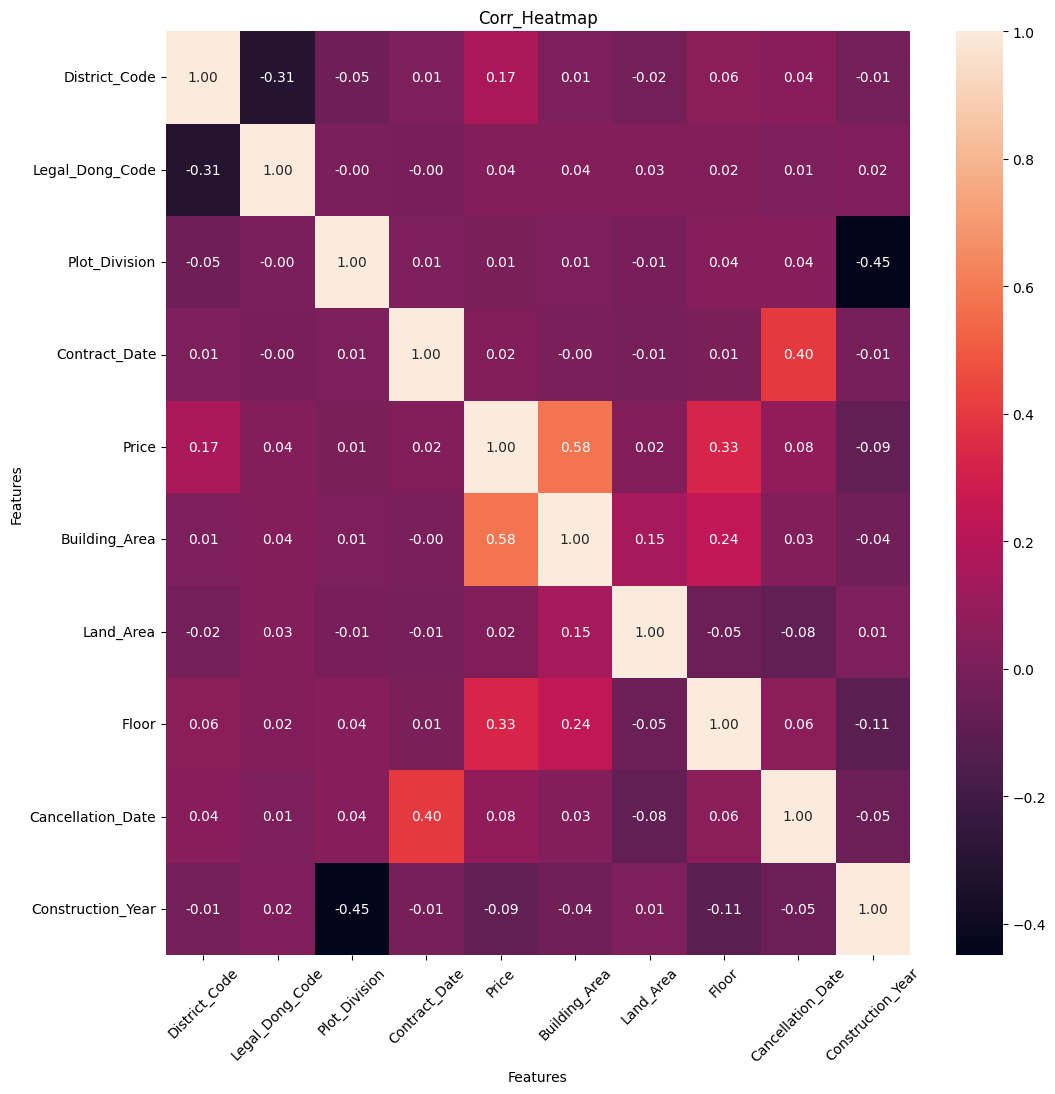

In [ ]:
import matplotlib

data_df_num = pd.DataFrame(data_df_num)

data_df_num = data_df_num.rename({'접수연도':'Receipt_Year'}, axis =1)
data_df_num = data_df_num.rename({'자치구코드':'District_Code'}, axis =1)
data_df_num = data_df_num.rename({'법정동코드':'Legal_Dong_Code'}, axis =1)
data_df_num = data_df_num.rename({'지번구분':'Plot_Division'}, axis =1)
data_df_num = data_df_num.rename({'계약일':'Contract_Date'}, axis =1)
data_df_num = data_df_num.rename({'물건금액(만원)':'Price'}, axis =1)
data_df_num = data_df_num.rename({'건물면적(㎡)':'Building_Area'}, axis =1)
data_df_num = data_df_num.rename({'토지면적(㎡)':'Land_Area'}, axis =1)
data_df_num = data_df_num.rename({'층':'Floor'}, axis =1)
data_df_num = data_df_num.rename({'취소일':'Cancellation_Date'}, axis =1)
data_df_num = data_df_num.rename({'건축년도':'Construction_Year'}, axis =1)\

data_df_num = data_df_num.drop(['Receipt_Year'], axis=1)


# 히트맵 그리기
plt.figure(figsize=(12, 12))
sns.heatmap(data_df_num.corr(), annot=True, fmt='.2f')

plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation = 45)
plt.title("Corr_Heatmap")
plt.show()

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86558 entries, 0 to 86557
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              86558 non-null  int64  
 1   자치구코드             86558 non-null  int64  
 2   자치구명              86557 non-null  object 
 3   법정동코드             86558 non-null  int64  
 4   법정동명              86558 non-null  object 
 5   지번구분              83622 non-null  float64
 6   지번구분명             83622 non-null  object 
 7   본번                83621 non-null  object 
 8   부번                83621 non-null  object 
 9   건물명               83621 non-null  object 
 10  계약일               86558 non-null  int64  
 11  물건금액(만원)          86558 non-null  int64  
 12  건물면적(㎡)           86558 non-null  float64
 13  토지면적(㎡)           81481 non-null  float64
 14  층                 83622 non-null  float64
 15  권리구분              831 non-null    object 
 16  취소일               3712 non-null   float6

In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구코드,0
자치구명,1
법정동코드,0
법정동명,0
지번구분,2936
지번구분명,2936
본번,2937
부번,2937
건물명,2937


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86558 entries, 0 to 86557
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              86558 non-null  int64  
 1   자치구코드             86558 non-null  int64  
 2   자치구명              86557 non-null  object 
 3   법정동코드             86558 non-null  int64  
 4   법정동명              86558 non-null  object 
 5   지번구분              83622 non-null  float64
 6   지번구분명             83622 non-null  object 
 7   본번                83621 non-null  object 
 8   부번                83621 non-null  object 
 9   건물명               83621 non-null  object 
 10  계약일               86558 non-null  int64  
 11  물건금액(만원)          86558 non-null  int64  
 12  건물면적(㎡)           86558 non-null  float64
 13  토지면적(㎡)           81481 non-null  float64
 14  층                 83622 non-null  float64
 15  권리구분              831 non-null    object 
 16  취소일               3712 non-null   float6

In [ ]:
data_df.describe()

,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,86558.0,86558.000000,86558.000000,83622.000000,8.655800e+04,8.655800e+04,86558.000000,81481.000000,83622.000000,3.712000e+03,86245.000000
mean,2024.0,11456.102324,10949.418887,1.004461,2.024041e+07,8.830621e+04,67.826903,18.817430,7.841130,2.024068e+07,1985.566804
std,0.0,185.296142,1234.024691,0.092749,1.384964e+03,8.822572e+04,52.817037,116.073664,6.321469,2.721715e+02,196.239837
min,2024.0,11110.000000,10100.000000,1.000000,2.021021e+07,2.600000e+03,8.480000,0.000000,-2.000000,2.024010e+07,0.000000
25%,2024.0,11305.000000,10200.000000,1.000000,2.024040e+07,3.180000e+04,41.388000,0.000000,3.000000,2.024050e+07,1996.000000
50%,2024.0,11470.000000,10600.000000,1.000000,2.024062e+07,6.500000e+04,59.910000,0.000000,6.000000,2.024071e+07,2004.000000
75%,2024.0,11620.000000,11000.000000,1.000000,2.024081e+07,1.140000e+05,84.860000,27.220000,11.000000,2.024091e+07,2016.000000
max,2024.0,26230.000000,18700.000000,3.000000,2.024112e+07,2.850000e+06,2932.270000,30822.000000,68.000000,2.024112e+07,2024.000000


In [ ]:
# 위에 describe를 보면 '건물면적'과'토지면적','층수'에 이상치가 있을것 같다는 의심이 든다. 이거부터 확인할 것!

In [ ]:
data_df.head(3)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11215,광진구,10500,자양동,1.0,대지,695,0,한양,20241119,238000,157.870,0.0,2.0,NaN,NaN,1983.0,아파트,중개거래,서울 광진구
1,2024,11290,성북구,12000,동선동5가,1.0,대지,172,8,현대빌라,20241119,25500,56.730,29.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 성북구
2,2024,11545,금천구,10200,독산동,1.0,대지,1147,0,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,NaN,NaN,2016.0,아파트,직거래,NaN


# **필요없는 컬럼 제거**

In [ ]:
data_df.drop(['자치구코드','법정동코드','지번구분','본번','부번'], axis=1, inplace=True)

In [ ]:
data_df.head(3)

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.0,2.0,NaN,NaN,1983.0,아파트,중개거래,서울 광진구
1,2024,성북구,동선동5가,대지,현대빌라,20241119,25500,56.730,29.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 성북구
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,NaN,NaN,2016.0,아파트,직거래,NaN


# **결측치 처리**

In [ ]:
check_null = data_df.isna().sum() / len(data_df)

In [ ]:
print(check_null)

접수연도                0.000000
자치구명                0.000012
법정동명                0.000000
지번구분명               0.033919
건물명                 0.033931
계약일                 0.000000
물건금액(만원)            0.000000
건물면적(㎡)             0.000000
토지면적(㎡)             0.058654
층                   0.033919
권리구분                0.990400
취소일                 0.957115
건축년도                0.003616
건물용도                0.000000
신고구분                0.000023
신고한 개업공인중개사 시군구명    0.115529
dtype: float64


In [ ]:
check_null[check_null >= 0.5]

,0
권리구분,0.990400
취소일,0.957115


In [ ]:
data_df['권리구분'] = data_df['권리구분'].fillna('정상거래')

In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구명,1
법정동명,0
지번구분명,2936
건물명,2937
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,2936


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86558 entries, 0 to 86557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              86558 non-null  int64  
 1   자치구명              86557 non-null  object 
 2   법정동명              86558 non-null  object 
 3   지번구분명             83622 non-null  object 
 4   건물명               83621 non-null  object 
 5   계약일               86558 non-null  int64  
 6   물건금액(만원)          86558 non-null  int64  
 7   건물면적(㎡)           86558 non-null  float64
 8   토지면적(㎡)           81481 non-null  float64
 9   층                 83622 non-null  float64
 10  권리구분              86558 non-null  object 
 11  취소일               3712 non-null   float64
 12  건축년도              86245 non-null  float64
 13  건물용도              86558 non-null  object 
 14  신고구분              86556 non-null  object 
 15  신고한 개업공인중개사 시군구명  76558 non-null  object 
dtypes: float64(5), int64(3), object(8)
memor

In [ ]:
data_df['취소일'] = data_df['취소일'].fillna(0)

In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구명,1
법정동명,0
지번구분명,2936
건물명,2937
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,2936


In [ ]:
data_df.head(3)

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.0,2.0,정상거래,0.0,1983.0,아파트,중개거래,서울 광진구
1,2024,성북구,동선동5가,대지,현대빌라,20241119,25500,56.730,29.0,4.0,정상거래,0.0,1994.0,연립다세대,중개거래,서울 성북구
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,정상거래,0.0,2016.0,아파트,직거래,NaN


In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구명,1
법정동명,0
지번구분명,2936
건물명,2937
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,2936


In [ ]:
data_df

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.000,2.0,정상거래,0.0,1983.0,아파트,중개거래,서울 광진구
1,2024,성북구,동선동5가,대지,현대빌라,20241119,25500,56.730,29.000,4.0,정상거래,0.0,1994.0,연립다세대,중개거래,서울 성북구
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.000,26.0,정상거래,0.0,2016.0,아파트,직거래,NaN
3,2024,금천구,시흥동,대지,현부스카이2,20241119,26700,50.015,72.711,7.0,정상거래,0.0,2018.0,오피스텔,중개거래,서울 금천구
4,2024,양천구,목동,대지,아호가(我好家),20241119,16000,14.950,9.000,4.0,정상거래,0.0,2013.0,연립다세대,중개거래,서울 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86553,2024,구로구,개봉동,대지,금석연립(170-33),20220708,9190,53.610,124.000,1.0,정상거래,20240207.0,1981.0,연립다세대,중개거래,서울 강남구
86554,2024,구로구,개봉동,대지,금석연립(170-33),20220708,9190,53.610,124.000,1.0,정상거래,20240207.0,1981.0,연립다세대,중개거래,서울 강남구
86555,2024,구로구,개봉동,대지,금석연립(170-33),20220708,9740,53.610,124.000,2.0,정상거래,20240207.0,1981.0,연립다세대,중개거래,서울 강남구
86556,2024,마포구,노고산동,NaN,NaN,20210719,195000,157.450,116.700,NaN,정상거래,20240417.0,1988.0,단독다가구,NaN,NaN


In [ ]:
data_df.dropna(subset= ['신고구분','층','건축년도'], inplace=True)

In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구명,1
법정동명,0
지번구분명,0
건물명,1
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,0


In [ ]:
data_df.drop('신고한 개업공인중개사 시군구명', axis=1, inplace=True)
data_df.isna().sum()

,0
접수연도,0
자치구명,1
법정동명,0
지번구분명,0
건물명,1
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,0


In [ ]:
missing_value = data_df.iloc[data_df['자치구명'].isna().values]
print(missing_value)

       접수연도 자치구명 법정동명 지번구분명                   건물명       계약일  물건금액(만원)  건물면적(㎡)  토지면적(㎡)    층 권리구분  취소일  건축년도 건물용도  신고구분
82946  2024  NaN  미아동    대지  2020년 2차 행복주택 입주자 모집  20240112     42450    72.13      0.0  5.0  분양권  0.0   0.0  아파트  중개거래


In [ ]:
data_df['자치구명'] = data_df['자치구명'].fillna('강북구')

In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구명,0
법정동명,0
지번구분명,0
건물명,1
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,0


In [ ]:
data_df.dropna(subset= ['건물명'], inplace=True)

In [ ]:
data_df.isna().sum()

,0
접수연도,0
자치구명,0
법정동명,0
지번구분명,0
건물명,0
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),5077
층,0


In [ ]:
data_df.dropna(subset= ['토지면적(㎡)'], inplace=True)
data_df.isna().sum()

,0
접수연도,0
자치구명,0
법정동명,0
지번구분명,0
건물명,0
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),0
층,0


In [ ]:
data_df

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.000,2.0,정상거래,0.0,1983.0,아파트,중개거래
1,2024,성북구,동선동5가,대지,현대빌라,20241119,25500,56.730,29.000,4.0,정상거래,0.0,1994.0,연립다세대,중개거래
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.000,26.0,정상거래,0.0,2016.0,아파트,직거래
3,2024,금천구,시흥동,대지,현부스카이2,20241119,26700,50.015,72.711,7.0,정상거래,0.0,2018.0,오피스텔,중개거래
4,2024,양천구,목동,대지,아호가(我好家),20241119,16000,14.950,9.000,4.0,정상거래,0.0,2013.0,연립다세대,중개거래
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86551,2024,광진구,화양동,대지,세종에버그린(101동),20230124,30000,27.550,9.880,8.0,정상거래,20240401.0,2018.0,연립다세대,중개거래
86552,2024,구로구,개봉동,대지,금석연립(170-33),20220708,9740,53.610,124.000,2.0,정상거래,20240207.0,1981.0,연립다세대,중개거래
86553,2024,구로구,개봉동,대지,금석연립(170-33),20220708,9190,53.610,124.000,1.0,정상거래,20240207.0,1981.0,연립다세대,중개거래
86554,2024,구로구,개봉동,대지,금석연립(170-33),20220708,9190,53.610,124.000,1.0,정상거래,20240207.0,1981.0,연립다세대,중개거래


# **이상치 처리**

In [ ]:
data_df[data_df['토지면적(㎡)'] == 0]

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.0,2.0,정상거래,0.0,1983.0,아파트,중개거래
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,정상거래,0.0,2016.0,아파트,직거래
7,2024,동작구,대방동,대지,대방동현대,20241119,98000,84.960,0.0,12.0,정상거래,0.0,1994.0,아파트,중개거래
11,2024,송파구,거여동,대지,거여4단지,20241118,65000,39.600,0.0,11.0,정상거래,20241119.0,1997.0,아파트,중개거래
18,2024,마포구,창전동,대지,해모로,20241118,137000,83.850,0.0,10.0,정상거래,0.0,2007.0,아파트,중개거래
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86540,2024,마포구,중동,대지,백명TRENDYAPT,20231111,76000,107.480,0.0,6.0,정상거래,0.0,2004.0,아파트,중개거래
86541,2024,성동구,사근동,대지,벽산,20231109,59000,59.840,0.0,1.0,정상거래,0.0,2000.0,아파트,중개거래
86543,2024,강남구,개포동,대지,래미안블레스티지,20230922,165000,49.909,0.0,15.0,정상거래,20240229.0,2019.0,아파트,중개거래
86545,2024,마포구,현석동,대지,밤섬힐스테이트,20230827,127500,59.400,0.0,24.0,정상거래,20241007.0,1999.0,아파트,중개거래


In [ ]:
data_df[data_df['건물용도'] == '아파트']
# 토지면적이 0인 것들이 아파트로 나오는것 같아서 아파트 컬럼수를 확인했더니 토지면적 = 0인 컬럼수가 같음.

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.0,2.0,정상거래,0.0,1983.0,아파트,중개거래
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,정상거래,0.0,2016.0,아파트,직거래
7,2024,동작구,대방동,대지,대방동현대,20241119,98000,84.960,0.0,12.0,정상거래,0.0,1994.0,아파트,중개거래
11,2024,송파구,거여동,대지,거여4단지,20241118,65000,39.600,0.0,11.0,정상거래,20241119.0,1997.0,아파트,중개거래
18,2024,마포구,창전동,대지,해모로,20241118,137000,83.850,0.0,10.0,정상거래,0.0,2007.0,아파트,중개거래
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86540,2024,마포구,중동,대지,백명TRENDYAPT,20231111,76000,107.480,0.0,6.0,정상거래,0.0,2004.0,아파트,중개거래
86541,2024,성동구,사근동,대지,벽산,20231109,59000,59.840,0.0,1.0,정상거래,0.0,2000.0,아파트,중개거래
86543,2024,강남구,개포동,대지,래미안블레스티지,20230922,165000,49.909,0.0,15.0,정상거래,20240229.0,2019.0,아파트,중개거래
86545,2024,마포구,현석동,대지,밤섬힐스테이트,20230827,127500,59.400,0.0,24.0,정상거래,20241007.0,1999.0,아파트,중개거래


In [ ]:
data_df[data_df['층'] == 0]

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분


In [ ]:
data_df = data_df[data_df['계약일'] >= 20230901]

In [ ]:
# 통상적으로 부동산 매매거래기간(계약금,중도금,잔금 절차 기간)은 3개월 전후이다 보니 3개월을 기준으로 계약일 컬럼 수정
data_df[data_df['계약일']< 20230901]

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78234 entries, 0 to 86543
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   접수연도      78234 non-null  int64  
 1   자치구명      78234 non-null  object 
 2   법정동명      78234 non-null  object 
 3   지번구분명     78234 non-null  object 
 4   건물명       78234 non-null  object 
 5   계약일       78234 non-null  int64  
 6   물건금액(만원)  78234 non-null  int64  
 7   건물면적(㎡)   78234 non-null  float64
 8   토지면적(㎡)   78234 non-null  float64
 9   층         78234 non-null  float64
 10  권리구분      78234 non-null  object 
 11  취소일       78234 non-null  float64
 12  건축년도      78234 non-null  float64
 13  건물용도      78234 non-null  object 
 14  신고구분      78234 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 9.6+ MB


In [ ]:
building_name_df = data_df['건물명']

In [ ]:
building_name_df

,건물명
0,한양
1,현대빌라
2,금천롯데캐슬골드파크1차
3,현부스카이2
4,아호가(我好家)
...,...
86538,KCC파크타운
86539,그레이스빌2차A
86540,백명TRENDYAPT
86541,벽산


In [ ]:
data_df.head(3)

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.0,2.0,정상거래,0.0,1983.0,아파트,중개거래
1,2024,성북구,동선동5가,대지,현대빌라,20241119,25500,56.730,29.0,4.0,정상거래,0.0,1994.0,연립다세대,중개거래
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,정상거래,0.0,2016.0,아파트,직거래


In [ ]:
!pip install konlpy
from konlpy.tag import Okt

In [ ]:
brand_names = [
    "힐스테이트", "푸르지오", "래미안", "e편한세상", "롯데캐슬","자이","수자인","아이파크","아테라","더샵","위브","서희스타힐스",
    "우미린","스위첸", "호반베르디움", "더플래티넘","한화포레나","코아루","데시앙","센트레빌","sk뷰", "에피트", "리슈빌", "하늘채",
    "벽산블루밍","동문굿모닝"
]

for i, building_name in data_df[["건물명"]].itertuples():
    for brand in brand_names:
        if brand.strip() in str(building_name).strip():
            data_df.loc[i, "브랜드명"] = brand

<ipython-input-1051-1a386e4c013f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[i, "브랜드명"] = brand


In [ ]:
data_df['브랜드명'] = data_df['브랜드명'].fillna('기타')

<ipython-input-1052-b94963393810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['브랜드명'] = data_df['브랜드명'].fillna('기타')


In [ ]:
data_df.head(3)

,접수연도,자치구명,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,브랜드명
0,2024,광진구,자양동,대지,한양,20241119,238000,157.870,0.0,2.0,정상거래,0.0,1983.0,아파트,중개거래,기타
1,2024,성북구,동선동5가,대지,현대빌라,20241119,25500,56.730,29.0,4.0,정상거래,0.0,1994.0,연립다세대,중개거래,기타
2,2024,금천구,독산동,대지,금천롯데캐슬골드파크1차,20241119,120000,84.811,0.0,26.0,정상거래,0.0,2016.0,아파트,직거래,롯데캐슬


In [ ]:
data_df_cp = data_df.copy()

# **One-Hot-Encoding 처리**

In [ ]:
data_df = data_df.drop(['건물명'], axis=1)
data_df.head(3)

,접수연도,자치구명,법정동명,지번구분명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,브랜드명
0,2024,광진구,자양동,대지,20241119,238000,157.870,0.0,2.0,정상거래,0.0,1983.0,아파트,중개거래,기타
1,2024,성북구,동선동5가,대지,20241119,25500,56.730,29.0,4.0,정상거래,0.0,1994.0,연립다세대,중개거래,기타
2,2024,금천구,독산동,대지,20241119,120000,84.811,0.0,26.0,정상거래,0.0,2016.0,아파트,직거래,롯데캐슬


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78234 entries, 0 to 86543
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   접수연도      78234 non-null  int64  
 1   자치구명      78234 non-null  object 
 2   법정동명      78234 non-null  object 
 3   지번구분명     78234 non-null  object 
 4   계약일       78234 non-null  int64  
 5   물건금액(만원)  78234 non-null  int64  
 6   건물면적(㎡)   78234 non-null  float64
 7   토지면적(㎡)   78234 non-null  float64
 8   층         78234 non-null  float64
 9   권리구분      78234 non-null  object 
 10  취소일       78234 non-null  float64
 11  건축년도      78234 non-null  float64
 12  건물용도      78234 non-null  object 
 13  신고구분      78234 non-null  object 
 14  브랜드명      78234 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 11.6+ MB


In [ ]:
# object 컬럼들은 현재 카테코리형으로 확인이 되어 따로 분리 없이 바로 인코딩 진행
data_df = pd.get_dummies(data_df, columns = ['자치구명','법정동명','지번구분명','권리구분','건물용도','신고구분','브랜드명'], drop_first = True)
data_df.head(3)

,접수연도,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명_가리봉동,법정동명_가산동,법정동명_가양동,법정동명_가회동,법정동명_갈월동,법정동명_갈현동,법정동명_강일동,법정동명_개봉동,법정동명_개포동,법정동명_개화동,법정동명_거여동,법정동명_견지동,법정동명_경운동,법정동명_계동,법정동명_고덕동,법정동명_고척동,법정동명_공덕동,법정동명_공릉동,법정동명_공항동,법정동명_관수동,법정동명_관철동,법정동명_광장동,법정동명_광희동1가,법정동명_교북동,법정동명_구기동,법정동명_구로동,법정동명_구산동,법정동명_구수동,법정동명_구의동,법정동명_군자동,법정동명_궁동,법정동명_금호동1가,법정동명_금호동2가,법정동명_금호동3가,법정동명_금호동4가,법정동명_길동,법정동명_길음동,법정동명_낙원동,법정동명_남가좌동,법정동명_남대문로5가,법정동명_남창동,법정동명_남현동,법정동명_내곡동,법정동명_내발산동,법정동명_내수동,법정동명_냉천동,법정동명_노고산동,법정동명_노량진동,법정동명_녹번동,법정동명_논현동,법정동명_누상동,법정동명_누하동,법정동명_능동,법정동명_답십리동,법정동명_당산동,법정동명_당산동1가,법정동명_당산동2가,법정동명_당산동3가,법정동명_당산동4가,법정동명_당산동5가,법정동명_당산동6가,법정동명_당인동,법정동명_당주동,법정동명_대림동,법정동명_대방동,법정동명_대신동,법정동명_대조동,법정동명_대치동,법정동명_대현동,법정동명_대흥동,법정동명_도곡동,법정동명_도림동,법정동명_도봉동,법정동명_도선동,법정동명_도원동,법정동명_도화동,법정동명_독산동,법정동명_돈암동,법정동명_돈의동,법정동명_동교동,법정동명_동빙고동,법정동명_동선동1가,법정동명_동선동3가,법정동명_동선동4가,법정동명_동선동5가,법정동명_동소문동4가,법정동명_동소문동5가,법정동명_동소문동6가,법정동명_동소문동7가,법정동명_동숭동,법정동명_동자동,법정동명_동작동,법정동명_둔촌동,법정동명_등촌동,법정동명_마곡동,법정동명_마장동,법정동명_마천동,법정동명_마포동,법정동명_만리동1가,법정동명_만리동2가,법정동명_망우동,법정동명_망원동,법정동명_면목동,법정동명_명륜1가,법정동명_명륜2가,법정동명_명륜3가,법정동명_명일동,법정동명_목동,법정동명_무악동,법정동명_묵동,법정동명_묵정동,법정동명_문래동1가,법정동명_문래동2가,법정동명_문래동3가,법정동명_문래동4가,법정동명_문래동5가,법정동명_문래동6가,법정동명_문배동,법정동명_문정동,법정동명_미아동,법정동명_반포동,법정동명_방배동,법정동명_방이동,법정동명_방학동,법정동명_방화동,법정동명_번동,법정동명_보광동,법정동명_보문동1가,법정동명_보문동2가,법정동명_보문동3가,법정동명_보문동4가,법정동명_보문동5가,법정동명_보문동6가,법정동명_보문동7가,법정동명_본동,법정동명_봉천동,법정동명_부암동,법정동명_북가좌동,법정동명_북아현동,법정동명_불광동,법정동명_사근동,법정동명_사당동,법정동명_사직동,법정동명_산천동,법정동명_삼선동1가,법정동명_삼선동2가,법정동명_삼선동3가,법정동명_삼선동4가,법정동명_삼선동5가,법정동명_삼성동,법정동명_삼전동,법정동명_삼청동,법정동명_상계동,법정동명_상도1동,법정동명_상도동,법정동명_상봉동,법정동명_상수동,법정동명_상암동,법정동명_상왕십리동,법정동명_상월곡동,법정동명_상일동,법정동명_서계동,법정동명_서교동,법정동명_서빙고동,법정동명_서초동,법정동명_석관동,법정동명_석촌동,법정동명_성내동,법정동명_성북동,법정동명_성북동1가,법정동명_성산동,법정동명_성수동1가,법정동명_성수동2가,법정동명_세곡동,법정동명_송정동,법정동명_송파동,법정동명_수색동,법정동명_수서동,법정동명_수송동,법정동명_수유동,법정동명_순화동,법정동명_숭인동,법정동명_시흥동,법정동명_신계동,법정동명_신공덕동,법정동명_신교동,법정동명_신길동,법정동명_신내동,법정동명_신당동,법정동명_신대방동,법정동명_신도림동,법정동명_신림동,법정동명_신문로1가,법정동명_신문로2가,법정동명_신사동,법정동명_신설동,법정동명_신수동,법정동명_신영동,법정동명_신원동,법정동명_신월동,법정동명_신정동,법정동명_신창동,법정동명_신천동,법정동명_신촌동,법정동명_쌍문동,법정동명_아현동,법정동명_안암동1가,법정동명_안암동3가,법정동명_안암동4가,법정동명_안암동5가,법정동명_암사동,법정동명_압구정동,법정동명_양재동,법정동명_양평동1가,법정동명_양평동2가,법정동명_양평동3가,법정동명_양평동4가,법정동명_양평동5가,법정동명_양평동6가,법정동명_여의도동,법정동명_역삼동,법정동명_역촌동,법정동명_연건동,법정동명_연남동,법정동명_연지동,법정동명_연희동,법정동명_염곡동,법정동명_염리동,법정동명_염창동,법정동명_영등포동,법정동명_영등포동1가,법정동명_영등포동2가,법정동명_영등포동3가,법정동명_영등포동4가,법정동명_영등포동5가,법정동명_영등포동6가,법정동명_영등포동7가,법정동명_영등포동8가,법정동명_영천동,법정동명_예장동,법정동명_오금동,법정동명_오류동,법정동명_오장동,법정동명_옥수동,법정동명_옥인동,법정동명_옥천동,법정동명_온수동,법정동명_외발산동,법정동명_용강동,법정동명_용답동,법정동명_용두동,법정동명_용문동,법정동명_용산동2가,법정동명_용산동3가,법정동명_용산동5가,법정동명_우면동,법정동명_우이동,법정동명_원남동,법정동명_원서동,법정동명_원효로1가,법정동명_원효로2가,법정동명_원효로3가,법정동명_원효로4가,법정동명_월계동,법정동명_율현동,법정동명_을지로2가,법정동명_을지로3가,법정동명_을지로4가,법정동명_을지로5가,법정동명_을지로6가,법정동명_응봉동,법정동명_응암동,법정동명_의주로1가,법정동명_이문동,법정동명_이촌동,법정동명_이태원동,법정동명_이화동,법정동명_익선동,법정동명_인의동,법정동명_인현동2가,법정동명_일원동,법정동명_입정동,법정동명_자곡동,법정동명_자양동,법정동명_잠실동,법정동명_잠원동,법정동명_장안동,법정동명_장위동,법정동명_장지동,법정동명_장충동1가,법정동명_장충동2가,법정동명_저동2가,법정동명_적선동,법정동명_전농동,법정동명_정동,법정동명_정릉동,법정동명_제기동,법정동명_종로1가,법정동명_종로5가,법정동명_종암동,법정동명_주성동,법정동명_중계동,법정동명_중곡동,법정동명_중동,법정동명_중림동,법정동명_중화동,법정동명_증산동,법정동명_진관동,법정동명_창동,법정동명_창신동,법정동명_창전동,법정동명_창천동,법정동명_천연동,법정동명_천왕동,법정동명_천호동,법정동명_청담동,법정동명_청량리동,법정동명_청암동,법정동명_청운동,법정동명_청파동1가,법정동명_청파동2가,법정동명_청파동3가,법정동명_체부동,법정동명_충무로2가,법정동명_충무로3가,법정동명_충무로4가,법정동명_충무로5가,법정동명_충신동,법정동명_충정로2가,법정동명_충정로3가,법정동명_토정동,법정동명_통인동,법정동명_평동,법정동명_평창동,법정동명_풍납동,법정동명_필동1가,법정동명_필동2가,법정동명_필동3가,법정동명_필운동,법정동명_하계동,법정동명_하왕십리동,법정동명_하월곡동,법정동명_하중동,법정동명_한강로1가,법정동명_한강로2가,법정동명_한강로3가,법정동명_한남동,법정동명_합동,법정동명_합정동,법정동명_항동,법정동명_행당동,법정동명_행촌동,법정동명_현석동,법정동명_현저동,법정동명_혜화동,법정동명_홍은동,법정동명_홍익동,법정동명_홍제동,법정동명_홍지동,법정동명_홍파동,법정동명_화곡동,법정동명_화양동,법정동명_황학동,법정동명_회기동,법정동명_회현동1가,법정동명_회현동2가,법정동명_효자동,법정동명_효제동,법정동명_효창동,법정동명_후암동,법정동명_휘경동,법정동명_흑석동,법정동명_흥인동,지번구분명_블럭,지번구분명_산,권리구분_입주권,권리구분_정상거래,건물용도_연립다세대,건물용도_오피스텔,신고구분_직거래,브랜드명_기타,브랜드명_더샵,브랜드명_더플래티넘,브랜드명_데시앙,브랜드명_동문굿모닝,브랜드명_래미안,브랜드명_롯데캐슬,브랜드명_리슈빌,브랜드명_벽산블루밍,브랜드명_서희

In [ ]:
data_df.shape

(78234, 433)

In [ ]:
data_df = data_df.drop(['접수연도'], axis=1)
data_df.head(3)

,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명_가리봉동,법정동명_가산동,법정동명_가양동,법정동명_가회동,법정동명_갈월동,법정동명_갈현동,법정동명_강일동,법정동명_개봉동,법정동명_개포동,법정동명_개화동,법정동명_거여동,법정동명_견지동,법정동명_경운동,법정동명_계동,법정동명_고덕동,법정동명_고척동,법정동명_공덕동,법정동명_공릉동,법정동명_공항동,법정동명_관수동,법정동명_관철동,법정동명_광장동,법정동명_광희동1가,법정동명_교북동,법정동명_구기동,법정동명_구로동,법정동명_구산동,법정동명_구수동,법정동명_구의동,법정동명_군자동,법정동명_궁동,법정동명_금호동1가,법정동명_금호동2가,법정동명_금호동3가,법정동명_금호동4가,법정동명_길동,법정동명_길음동,법정동명_낙원동,법정동명_남가좌동,법정동명_남대문로5가,법정동명_남창동,법정동명_남현동,법정동명_내곡동,법정동명_내발산동,법정동명_내수동,법정동명_냉천동,법정동명_노고산동,법정동명_노량진동,법정동명_녹번동,법정동명_논현동,법정동명_누상동,법정동명_누하동,법정동명_능동,법정동명_답십리동,법정동명_당산동,법정동명_당산동1가,법정동명_당산동2가,법정동명_당산동3가,법정동명_당산동4가,법정동명_당산동5가,법정동명_당산동6가,법정동명_당인동,법정동명_당주동,법정동명_대림동,법정동명_대방동,법정동명_대신동,법정동명_대조동,법정동명_대치동,법정동명_대현동,법정동명_대흥동,법정동명_도곡동,법정동명_도림동,법정동명_도봉동,법정동명_도선동,법정동명_도원동,법정동명_도화동,법정동명_독산동,법정동명_돈암동,법정동명_돈의동,법정동명_동교동,법정동명_동빙고동,법정동명_동선동1가,법정동명_동선동3가,법정동명_동선동4가,법정동명_동선동5가,법정동명_동소문동4가,법정동명_동소문동5가,법정동명_동소문동6가,법정동명_동소문동7가,법정동명_동숭동,법정동명_동자동,법정동명_동작동,법정동명_둔촌동,법정동명_등촌동,법정동명_마곡동,법정동명_마장동,법정동명_마천동,법정동명_마포동,법정동명_만리동1가,법정동명_만리동2가,법정동명_망우동,법정동명_망원동,법정동명_면목동,법정동명_명륜1가,법정동명_명륜2가,법정동명_명륜3가,법정동명_명일동,법정동명_목동,법정동명_무악동,법정동명_묵동,법정동명_묵정동,법정동명_문래동1가,법정동명_문래동2가,법정동명_문래동3가,법정동명_문래동4가,법정동명_문래동5가,법정동명_문래동6가,법정동명_문배동,법정동명_문정동,법정동명_미아동,법정동명_반포동,법정동명_방배동,법정동명_방이동,법정동명_방학동,법정동명_방화동,법정동명_번동,법정동명_보광동,법정동명_보문동1가,법정동명_보문동2가,법정동명_보문동3가,법정동명_보문동4가,법정동명_보문동5가,법정동명_보문동6가,법정동명_보문동7가,법정동명_본동,법정동명_봉천동,법정동명_부암동,법정동명_북가좌동,법정동명_북아현동,법정동명_불광동,법정동명_사근동,법정동명_사당동,법정동명_사직동,법정동명_산천동,법정동명_삼선동1가,법정동명_삼선동2가,법정동명_삼선동3가,법정동명_삼선동4가,법정동명_삼선동5가,법정동명_삼성동,법정동명_삼전동,법정동명_삼청동,법정동명_상계동,법정동명_상도1동,법정동명_상도동,법정동명_상봉동,법정동명_상수동,법정동명_상암동,법정동명_상왕십리동,법정동명_상월곡동,법정동명_상일동,법정동명_서계동,법정동명_서교동,법정동명_서빙고동,법정동명_서초동,법정동명_석관동,법정동명_석촌동,법정동명_성내동,법정동명_성북동,법정동명_성북동1가,법정동명_성산동,법정동명_성수동1가,법정동명_성수동2가,법정동명_세곡동,법정동명_송정동,법정동명_송파동,법정동명_수색동,법정동명_수서동,법정동명_수송동,법정동명_수유동,법정동명_순화동,법정동명_숭인동,법정동명_시흥동,법정동명_신계동,법정동명_신공덕동,법정동명_신교동,법정동명_신길동,법정동명_신내동,법정동명_신당동,법정동명_신대방동,법정동명_신도림동,법정동명_신림동,법정동명_신문로1가,법정동명_신문로2가,법정동명_신사동,법정동명_신설동,법정동명_신수동,법정동명_신영동,법정동명_신원동,법정동명_신월동,법정동명_신정동,법정동명_신창동,법정동명_신천동,법정동명_신촌동,법정동명_쌍문동,법정동명_아현동,법정동명_안암동1가,법정동명_안암동3가,법정동명_안암동4가,법정동명_안암동5가,법정동명_암사동,법정동명_압구정동,법정동명_양재동,법정동명_양평동1가,법정동명_양평동2가,법정동명_양평동3가,법정동명_양평동4가,법정동명_양평동5가,법정동명_양평동6가,법정동명_여의도동,법정동명_역삼동,법정동명_역촌동,법정동명_연건동,법정동명_연남동,법정동명_연지동,법정동명_연희동,법정동명_염곡동,법정동명_염리동,법정동명_염창동,법정동명_영등포동,법정동명_영등포동1가,법정동명_영등포동2가,법정동명_영등포동3가,법정동명_영등포동4가,법정동명_영등포동5가,법정동명_영등포동6가,법정동명_영등포동7가,법정동명_영등포동8가,법정동명_영천동,법정동명_예장동,법정동명_오금동,법정동명_오류동,법정동명_오장동,법정동명_옥수동,법정동명_옥인동,법정동명_옥천동,법정동명_온수동,법정동명_외발산동,법정동명_용강동,법정동명_용답동,법정동명_용두동,법정동명_용문동,법정동명_용산동2가,법정동명_용산동3가,법정동명_용산동5가,법정동명_우면동,법정동명_우이동,법정동명_원남동,법정동명_원서동,법정동명_원효로1가,법정동명_원효로2가,법정동명_원효로3가,법정동명_원효로4가,법정동명_월계동,법정동명_율현동,법정동명_을지로2가,법정동명_을지로3가,법정동명_을지로4가,법정동명_을지로5가,법정동명_을지로6가,법정동명_응봉동,법정동명_응암동,법정동명_의주로1가,법정동명_이문동,법정동명_이촌동,법정동명_이태원동,법정동명_이화동,법정동명_익선동,법정동명_인의동,법정동명_인현동2가,법정동명_일원동,법정동명_입정동,법정동명_자곡동,법정동명_자양동,법정동명_잠실동,법정동명_잠원동,법정동명_장안동,법정동명_장위동,법정동명_장지동,법정동명_장충동1가,법정동명_장충동2가,법정동명_저동2가,법정동명_적선동,법정동명_전농동,법정동명_정동,법정동명_정릉동,법정동명_제기동,법정동명_종로1가,법정동명_종로5가,법정동명_종암동,법정동명_주성동,법정동명_중계동,법정동명_중곡동,법정동명_중동,법정동명_중림동,법정동명_중화동,법정동명_증산동,법정동명_진관동,법정동명_창동,법정동명_창신동,법정동명_창전동,법정동명_창천동,법정동명_천연동,법정동명_천왕동,법정동명_천호동,법정동명_청담동,법정동명_청량리동,법정동명_청암동,법정동명_청운동,법정동명_청파동1가,법정동명_청파동2가,법정동명_청파동3가,법정동명_체부동,법정동명_충무로2가,법정동명_충무로3가,법정동명_충무로4가,법정동명_충무로5가,법정동명_충신동,법정동명_충정로2가,법정동명_충정로3가,법정동명_토정동,법정동명_통인동,법정동명_평동,법정동명_평창동,법정동명_풍납동,법정동명_필동1가,법정동명_필동2가,법정동명_필동3가,법정동명_필운동,법정동명_하계동,법정동명_하왕십리동,법정동명_하월곡동,법정동명_하중동,법정동명_한강로1가,법정동명_한강로2가,법정동명_한강로3가,법정동명_한남동,법정동명_합동,법정동명_합정동,법정동명_항동,법정동명_행당동,법정동명_행촌동,법정동명_현석동,법정동명_현저동,법정동명_혜화동,법정동명_홍은동,법정동명_홍익동,법정동명_홍제동,법정동명_홍지동,법정동명_홍파동,법정동명_화곡동,법정동명_화양동,법정동명_황학동,법정동명_회기동,법정동명_회현동1가,법정동명_회현동2가,법정동명_효자동,법정동명_효제동,법정동명_효창동,법정동명_후암동,법정동명_휘경동,법정동명_흑석동,법정동명_흥인동,지번구분명_블럭,지번구분명_산,권리구분_입주권,권리구분_정상거래,건물용도_연립다세대,건물용도_오피스텔,신고구분_직거래,브랜드명_기타,브랜드명_더샵,브랜드명_더플래티넘,브랜드명_데시앙,브랜드명_동문굿모닝,브랜드명_래미안,브랜드명_롯데캐슬,브랜드명_리슈빌,브랜드명_벽산블루밍,브랜드명_서희스타힐스,

In [ ]:
data_df['건축년도'] = data_df['건축년도'].astype('int')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78234 entries, 0 to 86543
Columns: 432 entries, 계약일 to 브랜드명_힐스테이트
dtypes: bool(425), float64(4), int64(3)
memory usage: 38.5 MB


In [ ]:
data_df.head(3)

,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명_가리봉동,법정동명_가산동,법정동명_가양동,법정동명_가회동,법정동명_갈월동,법정동명_갈현동,법정동명_강일동,법정동명_개봉동,법정동명_개포동,법정동명_개화동,법정동명_거여동,법정동명_견지동,법정동명_경운동,법정동명_계동,법정동명_고덕동,법정동명_고척동,법정동명_공덕동,법정동명_공릉동,법정동명_공항동,법정동명_관수동,법정동명_관철동,법정동명_광장동,법정동명_광희동1가,법정동명_교북동,법정동명_구기동,법정동명_구로동,법정동명_구산동,법정동명_구수동,법정동명_구의동,법정동명_군자동,법정동명_궁동,법정동명_금호동1가,법정동명_금호동2가,법정동명_금호동3가,법정동명_금호동4가,법정동명_길동,법정동명_길음동,법정동명_낙원동,법정동명_남가좌동,법정동명_남대문로5가,법정동명_남창동,법정동명_남현동,법정동명_내곡동,법정동명_내발산동,법정동명_내수동,법정동명_냉천동,법정동명_노고산동,법정동명_노량진동,법정동명_녹번동,법정동명_논현동,법정동명_누상동,법정동명_누하동,법정동명_능동,법정동명_답십리동,법정동명_당산동,법정동명_당산동1가,법정동명_당산동2가,법정동명_당산동3가,법정동명_당산동4가,법정동명_당산동5가,법정동명_당산동6가,법정동명_당인동,법정동명_당주동,법정동명_대림동,법정동명_대방동,법정동명_대신동,법정동명_대조동,법정동명_대치동,법정동명_대현동,법정동명_대흥동,법정동명_도곡동,법정동명_도림동,법정동명_도봉동,법정동명_도선동,법정동명_도원동,법정동명_도화동,법정동명_독산동,법정동명_돈암동,법정동명_돈의동,법정동명_동교동,법정동명_동빙고동,법정동명_동선동1가,법정동명_동선동3가,법정동명_동선동4가,법정동명_동선동5가,법정동명_동소문동4가,법정동명_동소문동5가,법정동명_동소문동6가,법정동명_동소문동7가,법정동명_동숭동,법정동명_동자동,법정동명_동작동,법정동명_둔촌동,법정동명_등촌동,법정동명_마곡동,법정동명_마장동,법정동명_마천동,법정동명_마포동,법정동명_만리동1가,법정동명_만리동2가,법정동명_망우동,법정동명_망원동,법정동명_면목동,법정동명_명륜1가,법정동명_명륜2가,법정동명_명륜3가,법정동명_명일동,법정동명_목동,법정동명_무악동,법정동명_묵동,법정동명_묵정동,법정동명_문래동1가,법정동명_문래동2가,법정동명_문래동3가,법정동명_문래동4가,법정동명_문래동5가,법정동명_문래동6가,법정동명_문배동,법정동명_문정동,법정동명_미아동,법정동명_반포동,법정동명_방배동,법정동명_방이동,법정동명_방학동,법정동명_방화동,법정동명_번동,법정동명_보광동,법정동명_보문동1가,법정동명_보문동2가,법정동명_보문동3가,법정동명_보문동4가,법정동명_보문동5가,법정동명_보문동6가,법정동명_보문동7가,법정동명_본동,법정동명_봉천동,법정동명_부암동,법정동명_북가좌동,법정동명_북아현동,법정동명_불광동,법정동명_사근동,법정동명_사당동,법정동명_사직동,법정동명_산천동,법정동명_삼선동1가,법정동명_삼선동2가,법정동명_삼선동3가,법정동명_삼선동4가,법정동명_삼선동5가,법정동명_삼성동,법정동명_삼전동,법정동명_삼청동,법정동명_상계동,법정동명_상도1동,법정동명_상도동,법정동명_상봉동,법정동명_상수동,법정동명_상암동,법정동명_상왕십리동,법정동명_상월곡동,법정동명_상일동,법정동명_서계동,법정동명_서교동,법정동명_서빙고동,법정동명_서초동,법정동명_석관동,법정동명_석촌동,법정동명_성내동,법정동명_성북동,법정동명_성북동1가,법정동명_성산동,법정동명_성수동1가,법정동명_성수동2가,법정동명_세곡동,법정동명_송정동,법정동명_송파동,법정동명_수색동,법정동명_수서동,법정동명_수송동,법정동명_수유동,법정동명_순화동,법정동명_숭인동,법정동명_시흥동,법정동명_신계동,법정동명_신공덕동,법정동명_신교동,법정동명_신길동,법정동명_신내동,법정동명_신당동,법정동명_신대방동,법정동명_신도림동,법정동명_신림동,법정동명_신문로1가,법정동명_신문로2가,법정동명_신사동,법정동명_신설동,법정동명_신수동,법정동명_신영동,법정동명_신원동,법정동명_신월동,법정동명_신정동,법정동명_신창동,법정동명_신천동,법정동명_신촌동,법정동명_쌍문동,법정동명_아현동,법정동명_안암동1가,법정동명_안암동3가,법정동명_안암동4가,법정동명_안암동5가,법정동명_암사동,법정동명_압구정동,법정동명_양재동,법정동명_양평동1가,법정동명_양평동2가,법정동명_양평동3가,법정동명_양평동4가,법정동명_양평동5가,법정동명_양평동6가,법정동명_여의도동,법정동명_역삼동,법정동명_역촌동,법정동명_연건동,법정동명_연남동,법정동명_연지동,법정동명_연희동,법정동명_염곡동,법정동명_염리동,법정동명_염창동,법정동명_영등포동,법정동명_영등포동1가,법정동명_영등포동2가,법정동명_영등포동3가,법정동명_영등포동4가,법정동명_영등포동5가,법정동명_영등포동6가,법정동명_영등포동7가,법정동명_영등포동8가,법정동명_영천동,법정동명_예장동,법정동명_오금동,법정동명_오류동,법정동명_오장동,법정동명_옥수동,법정동명_옥인동,법정동명_옥천동,법정동명_온수동,법정동명_외발산동,법정동명_용강동,법정동명_용답동,법정동명_용두동,법정동명_용문동,법정동명_용산동2가,법정동명_용산동3가,법정동명_용산동5가,법정동명_우면동,법정동명_우이동,법정동명_원남동,법정동명_원서동,법정동명_원효로1가,법정동명_원효로2가,법정동명_원효로3가,법정동명_원효로4가,법정동명_월계동,법정동명_율현동,법정동명_을지로2가,법정동명_을지로3가,법정동명_을지로4가,법정동명_을지로5가,법정동명_을지로6가,법정동명_응봉동,법정동명_응암동,법정동명_의주로1가,법정동명_이문동,법정동명_이촌동,법정동명_이태원동,법정동명_이화동,법정동명_익선동,법정동명_인의동,법정동명_인현동2가,법정동명_일원동,법정동명_입정동,법정동명_자곡동,법정동명_자양동,법정동명_잠실동,법정동명_잠원동,법정동명_장안동,법정동명_장위동,법정동명_장지동,법정동명_장충동1가,법정동명_장충동2가,법정동명_저동2가,법정동명_적선동,법정동명_전농동,법정동명_정동,법정동명_정릉동,법정동명_제기동,법정동명_종로1가,법정동명_종로5가,법정동명_종암동,법정동명_주성동,법정동명_중계동,법정동명_중곡동,법정동명_중동,법정동명_중림동,법정동명_중화동,법정동명_증산동,법정동명_진관동,법정동명_창동,법정동명_창신동,법정동명_창전동,법정동명_창천동,법정동명_천연동,법정동명_천왕동,법정동명_천호동,법정동명_청담동,법정동명_청량리동,법정동명_청암동,법정동명_청운동,법정동명_청파동1가,법정동명_청파동2가,법정동명_청파동3가,법정동명_체부동,법정동명_충무로2가,법정동명_충무로3가,법정동명_충무로4가,법정동명_충무로5가,법정동명_충신동,법정동명_충정로2가,법정동명_충정로3가,법정동명_토정동,법정동명_통인동,법정동명_평동,법정동명_평창동,법정동명_풍납동,법정동명_필동1가,법정동명_필동2가,법정동명_필동3가,법정동명_필운동,법정동명_하계동,법정동명_하왕십리동,법정동명_하월곡동,법정동명_하중동,법정동명_한강로1가,법정동명_한강로2가,법정동명_한강로3가,법정동명_한남동,법정동명_합동,법정동명_합정동,법정동명_항동,법정동명_행당동,법정동명_행촌동,법정동명_현석동,법정동명_현저동,법정동명_혜화동,법정동명_홍은동,법정동명_홍익동,법정동명_홍제동,법정동명_홍지동,법정동명_홍파동,법정동명_화곡동,법정동명_화양동,법정동명_황학동,법정동명_회기동,법정동명_회현동1가,법정동명_회현동2가,법정동명_효자동,법정동명_효제동,법정동명_효창동,법정동명_후암동,법정동명_휘경동,법정동명_흑석동,법정동명_흥인동,지번구분명_블럭,지번구분명_산,권리구분_입주권,권리구분_정상거래,건물용도_연립다세대,건물용도_오피스텔,신고구분_직거래,브랜드명_기타,브랜드명_더샵,브랜드명_더플래티넘,브랜드명_데시앙,브랜드명_동문굿모닝,브랜드명_래미안,브랜드명_롯데캐슬,브랜드명_리슈빌,브랜드명_벽산블루밍,브랜드명_서희스타힐스,

# **Target값의 분포도 파악**

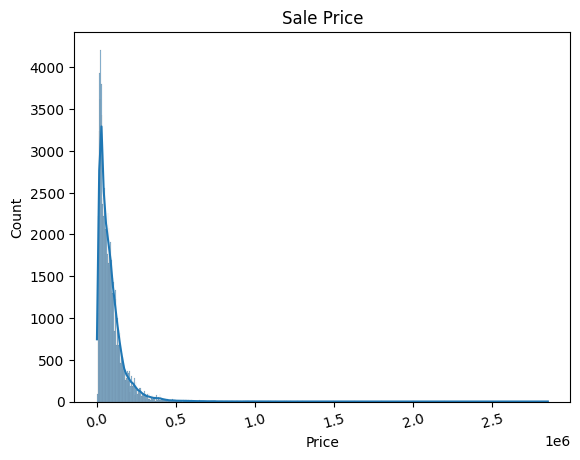

In [ ]:
plt.title('Sale Price')
plt.xticks(rotation=15)
sns.histplot(data_df_num['Price'], kde=True)
plt.show()

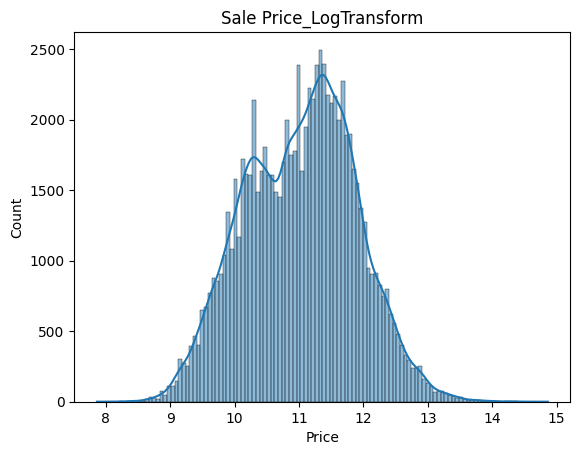

In [ ]:
plt.title('Sale Price_LogTransform')
log_SalePrice = np.log1p(data_df_num['Price'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [ ]:
from scipy.stats import skew

skewness=data_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

,0
법정동명_삼청동,279.698051
법정동명_삼선동1가,279.698051
법정동명_보문동4가,279.698051
법정동명_대신동,279.698051
법정동명_이화동,279.698051
...,...
건물용도_연립다세대,0.826779
브랜드명_기타,-1.568453
계약일,-6.264197
건축년도,-9.502028


In [ ]:
skewness_bad=skewness[abs(skewness)>0.5]

skewness_bad.sort_values(ascending=False)

,0
법정동명_삼청동,279.698051
법정동명_삼선동1가,279.698051
법정동명_보문동4가,279.698051
법정동명_대신동,279.698051
법정동명_이화동,279.698051
...,...
건물용도_연립다세대,0.826779
브랜드명_기타,-1.568453
계약일,-6.264197
건축년도,-9.502028


In [ ]:
skew_features=data_df[skewness_bad.index]

In [ ]:
skew_features=np.log(skew_features +1)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [ ]:
sn=list(skewness.index)

In [ ]:
snb=list(skewness_bad.index)

In [ ]:
for i in sn:
  if i in snb:
    pass

  else:
    print(i)

In [ ]:
# data_df_new=pd.merge(data_df,skew_features,left_index=True,right_index=True)

In [ ]:
# data_df_new

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링 적용
ss = StandardScaler()
data_scaled = ss.fit_transform(data_df)

print("스케일링 후 데이터:")
print(data_scaled)

스케일링 후 데이터:
[[ 5.02997408e-01  1.88458477e+00  3.20729656e+00 ... -3.15912012e-02
  -6.19257374e-03 -1.42078196e-01]
 [ 5.02997408e-01 -7.20161898e-01 -1.81565092e-01 ... -3.15912012e-02
  -6.19257374e-03 -1.42078196e-01]
 [ 5.02997408e-01  4.38184269e-01  7.59334889e-01 ... -3.15912012e-02
  -6.19257374e-03 -1.42078196e-01]
 ...
 [-6.72668085e+00 -1.01151513e-01  1.51889693e+00 ... -3.15912012e-02
  -6.19257374e-03 -1.42078196e-01]
 [-6.72812563e+00 -3.09531246e-01 -7.73594393e-02 ... -3.15912012e-02
  -6.19257374e-03 -1.42078196e-01]
 [-6.86321254e+00  9.89777682e-01 -4.10113889e-01 ... -3.15912012e-02
  -6.19257374e-03 -1.42078196e-01]]


In [ ]:
data_df_scaled = pd.DataFrame(data = data_scaled , columns = data_df.columns)
data_df_scaled.head(3)

,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명_가리봉동,법정동명_가산동,법정동명_가양동,법정동명_가회동,법정동명_갈월동,법정동명_갈현동,법정동명_강일동,법정동명_개봉동,법정동명_개포동,법정동명_개화동,법정동명_거여동,법정동명_견지동,법정동명_경운동,법정동명_계동,법정동명_고덕동,법정동명_고척동,법정동명_공덕동,법정동명_공릉동,법정동명_공항동,법정동명_관수동,법정동명_관철동,법정동명_광장동,법정동명_광희동1가,법정동명_교북동,법정동명_구기동,법정동명_구로동,법정동명_구산동,법정동명_구수동,법정동명_구의동,법정동명_군자동,법정동명_궁동,법정동명_금호동1가,법정동명_금호동2가,법정동명_금호동3가,법정동명_금호동4가,법정동명_길동,법정동명_길음동,법정동명_낙원동,법정동명_남가좌동,법정동명_남대문로5가,법정동명_남창동,법정동명_남현동,법정동명_내곡동,법정동명_내발산동,법정동명_내수동,법정동명_냉천동,법정동명_노고산동,법정동명_노량진동,법정동명_녹번동,법정동명_논현동,법정동명_누상동,법정동명_누하동,법정동명_능동,법정동명_답십리동,법정동명_당산동,법정동명_당산동1가,법정동명_당산동2가,법정동명_당산동3가,법정동명_당산동4가,법정동명_당산동5가,법정동명_당산동6가,법정동명_당인동,법정동명_당주동,법정동명_대림동,법정동명_대방동,법정동명_대신동,법정동명_대조동,법정동명_대치동,법정동명_대현동,법정동명_대흥동,법정동명_도곡동,법정동명_도림동,법정동명_도봉동,법정동명_도선동,법정동명_도원동,법정동명_도화동,법정동명_독산동,법정동명_돈암동,법정동명_돈의동,법정동명_동교동,법정동명_동빙고동,법정동명_동선동1가,법정동명_동선동3가,법정동명_동선동4가,법정동명_동선동5가,법정동명_동소문동4가,법정동명_동소문동5가,법정동명_동소문동6가,법정동명_동소문동7가,법정동명_동숭동,법정동명_동자동,법정동명_동작동,법정동명_둔촌동,법정동명_등촌동,법정동명_마곡동,법정동명_마장동,법정동명_마천동,법정동명_마포동,법정동명_만리동1가,법정동명_만리동2가,법정동명_망우동,법정동명_망원동,법정동명_면목동,법정동명_명륜1가,법정동명_명륜2가,법정동명_명륜3가,법정동명_명일동,법정동명_목동,법정동명_무악동,법정동명_묵동,법정동명_묵정동,법정동명_문래동1가,법정동명_문래동2가,법정동명_문래동3가,법정동명_문래동4가,법정동명_문래동5가,법정동명_문래동6가,법정동명_문배동,법정동명_문정동,법정동명_미아동,법정동명_반포동,법정동명_방배동,법정동명_방이동,법정동명_방학동,법정동명_방화동,법정동명_번동,법정동명_보광동,법정동명_보문동1가,법정동명_보문동2가,법정동명_보문동3가,법정동명_보문동4가,법정동명_보문동5가,법정동명_보문동6가,법정동명_보문동7가,법정동명_본동,법정동명_봉천동,법정동명_부암동,법정동명_북가좌동,법정동명_북아현동,법정동명_불광동,법정동명_사근동,법정동명_사당동,법정동명_사직동,법정동명_산천동,법정동명_삼선동1가,법정동명_삼선동2가,법정동명_삼선동3가,법정동명_삼선동4가,법정동명_삼선동5가,법정동명_삼성동,법정동명_삼전동,법정동명_삼청동,법정동명_상계동,법정동명_상도1동,법정동명_상도동,법정동명_상봉동,법정동명_상수동,법정동명_상암동,법정동명_상왕십리동,법정동명_상월곡동,법정동명_상일동,법정동명_서계동,법정동명_서교동,법정동명_서빙고동,법정동명_서초동,법정동명_석관동,법정동명_석촌동,법정동명_성내동,법정동명_성북동,법정동명_성북동1가,법정동명_성산동,법정동명_성수동1가,법정동명_성수동2가,법정동명_세곡동,법정동명_송정동,법정동명_송파동,법정동명_수색동,법정동명_수서동,법정동명_수송동,법정동명_수유동,법정동명_순화동,법정동명_숭인동,법정동명_시흥동,법정동명_신계동,법정동명_신공덕동,법정동명_신교동,법정동명_신길동,법정동명_신내동,법정동명_신당동,법정동명_신대방동,법정동명_신도림동,법정동명_신림동,법정동명_신문로1가,법정동명_신문로2가,법정동명_신사동,법정동명_신설동,법정동명_신수동,법정동명_신영동,법정동명_신원동,법정동명_신월동,법정동명_신정동,법정동명_신창동,법정동명_신천동,법정동명_신촌동,법정동명_쌍문동,법정동명_아현동,법정동명_안암동1가,법정동명_안암동3가,법정동명_안암동4가,법정동명_안암동5가,법정동명_암사동,법정동명_압구정동,법정동명_양재동,법정동명_양평동1가,법정동명_양평동2가,법정동명_양평동3가,법정동명_양평동4가,법정동명_양평동5가,법정동명_양평동6가,법정동명_여의도동,법정동명_역삼동,법정동명_역촌동,법정동명_연건동,법정동명_연남동,법정동명_연지동,법정동명_연희동,법정동명_염곡동,법정동명_염리동,법정동명_염창동,법정동명_영등포동,법정동명_영등포동1가,법정동명_영등포동2가,법정동명_영등포동3가,법정동명_영등포동4가,법정동명_영등포동5가,법정동명_영등포동6가,법정동명_영등포동7가,법정동명_영등포동8가,법정동명_영천동,법정동명_예장동,법정동명_오금동,법정동명_오류동,법정동명_오장동,법정동명_옥수동,법정동명_옥인동,법정동명_옥천동,법정동명_온수동,법정동명_외발산동,법정동명_용강동,법정동명_용답동,법정동명_용두동,법정동명_용문동,법정동명_용산동2가,법정동명_용산동3가,법정동명_용산동5가,법정동명_우면동,법정동명_우이동,법정동명_원남동,법정동명_원서동,법정동명_원효로1가,법정동명_원효로2가,법정동명_원효로3가,법정동명_원효로4가,법정동명_월계동,법정동명_율현동,법정동명_을지로2가,법정동명_을지로3가,법정동명_을지로4가,법정동명_을지로5가,법정동명_을지로6가,법정동명_응봉동,법정동명_응암동,법정동명_의주로1가,법정동명_이문동,법정동명_이촌동,법정동명_이태원동,법정동명_이화동,법정동명_익선동,법정동명_인의동,법정동명_인현동2가,법정동명_일원동,법정동명_입정동,법정동명_자곡동,법정동명_자양동,법정동명_잠실동,법정동명_잠원동,법정동명_장안동,법정동명_장위동,법정동명_장지동,법정동명_장충동1가,법정동명_장충동2가,법정동명_저동2가,법정동명_적선동,법정동명_전농동,법정동명_정동,법정동명_정릉동,법정동명_제기동,법정동명_종로1가,법정동명_종로5가,법정동명_종암동,법정동명_주성동,법정동명_중계동,법정동명_중곡동,법정동명_중동,법정동명_중림동,법정동명_중화동,법정동명_증산동,법정동명_진관동,법정동명_창동,법정동명_창신동,법정동명_창전동,법정동명_창천동,법정동명_천연동,법정동명_천왕동,법정동명_천호동,법정동명_청담동,법정동명_청량리동,법정동명_청암동,법정동명_청운동,법정동명_청파동1가,법정동명_청파동2가,법정동명_청파동3가,법정동명_체부동,법정동명_충무로2가,법정동명_충무로3가,법정동명_충무로4가,법정동명_충무로5가,법정동명_충신동,법정동명_충정로2가,법정동명_충정로3가,법정동명_토정동,법정동명_통인동,법정동명_평동,법정동명_평창동,법정동명_풍납동,법정동명_필동1가,법정동명_필동2가,법정동명_필동3가,법정동명_필운동,법정동명_하계동,법정동명_하왕십리동,법정동명_하월곡동,법정동명_하중동,법정동명_한강로1가,법정동명_한강로2가,법정동명_한강로3가,법정동명_한남동,법정동명_합동,법정동명_합정동,법정동명_항동,법정동명_행당동,법정동명_행촌동,법정동명_현석동,법정동명_현저동,법정동명_혜화동,법정동명_홍은동,법정동명_홍익동,법정동명_홍제동,법정동명_홍지동,법정동명_홍파동,법정동명_화곡동,법정동명_화양동,법정동명_황학동,법정동명_회기동,법정동명_회현동1가,법정동명_회현동2가,법정동명_효자동,법정동명_효제동,법정동명_효창동,법정동명_후암동,법정동명_휘경동,법정동명_흑석동,법정동명_흥인동,지번구분명_블럭,지번구분명_산,권리구분_입주권,권리구분_정상거래,건물용도_연립다세대,건물용도_오피스텔,신고구분_직거래,브랜드명_기타,브랜드명_더샵,브랜드명_더플래티넘,브랜드명_데시앙,브랜드명_동문굿모닝,브랜드명_래미안,브랜드명_롯데캐슬,브랜드명_리슈빌,브랜드명_벽산블루밍,브랜드명_서희스타힐스,

In [ ]:

def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test , pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__, '로그 변환된 RMSE:' , np.round(rmse,3))
  return rmse


In [ ]:

def get_rmses(models):
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=data_df_scaled['물건금액(만원)']
X_features=data_df_scaled.drop('물건금액(만원)',axis=1,inplace=False)

X_train , X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# test에서는 scaling을 적용하지 않아서 LinearRegression

LinearRegression 로그 변환된 RMSE: 3087940086189.05
Ridge 로그 변환된 RMSE: 0.462
Lasso 로그 변환된 RMSE: 1.032


[3087940086189.05, 0.4621094053471385, 1.0324999372884538]

In [ ]:
prediction=np.exp(3087940086189.05)-1
print(prediction)

inf


<ipython-input-1084-9248c4d5d4c0>:1: RuntimeWarning: overflow encountered in exp
  prediction=np.exp(3087940086189.05)-1


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*a

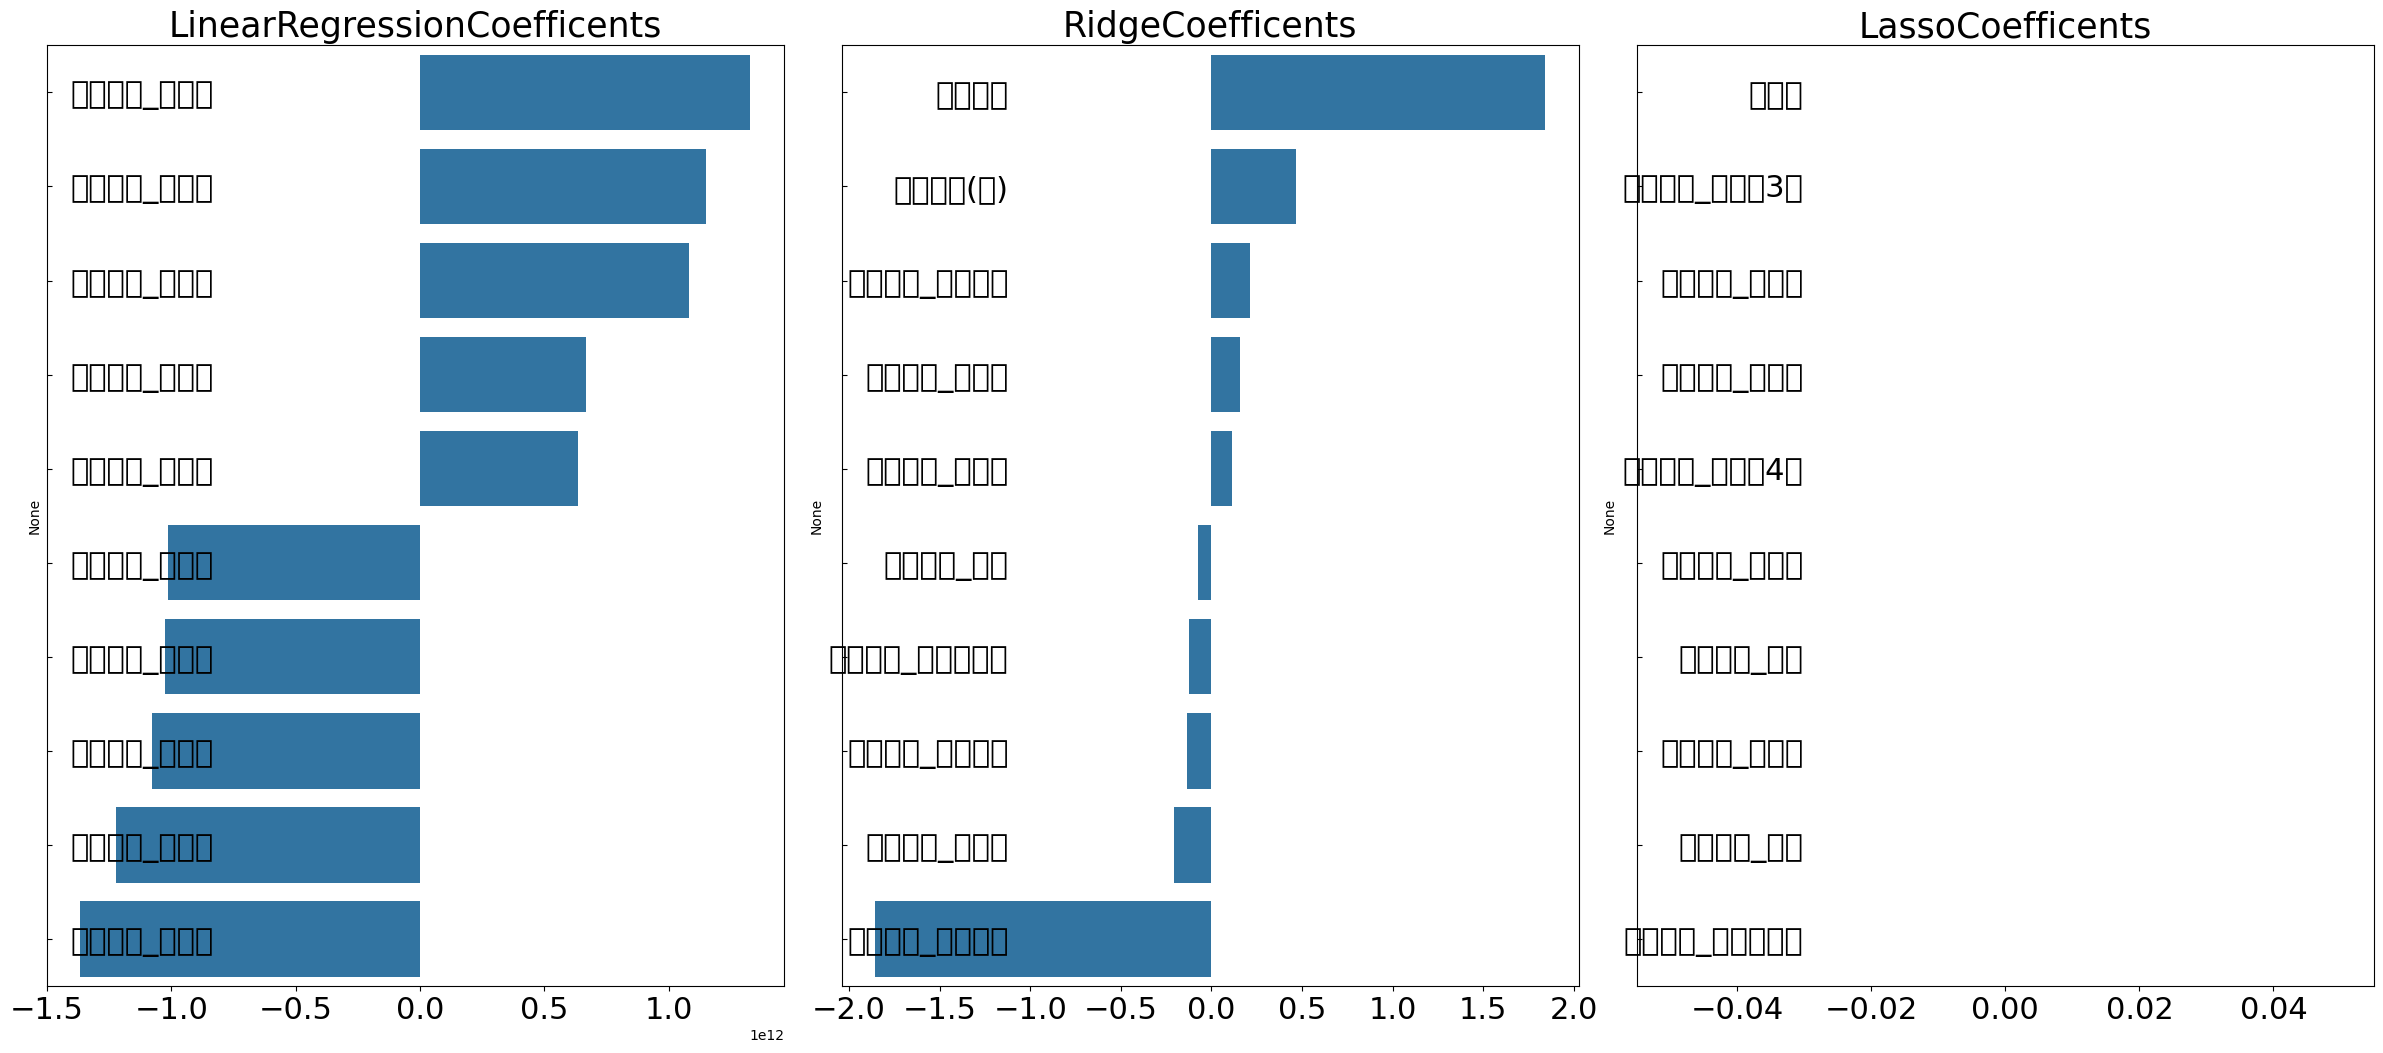

In [ ]:
# Coefficients 속성 기반 시리즈 객체 함수

def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)

# 상하위 10개 회귀 계수 추출 반환

    coef_high = coef.sort_values(ascending=False).head()
    coef_low = coef.sort_values(ascending=False).tail()
    return coef_high, coef_low

# 모델별 회귀계수 시각화

def visualize_coefficient(models):

    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()

    for i_num, model in enumerate(models):

         coef_high, coef_low = get_top_bottom_coef(model)
         coef_concat = pd.concat([coef_high, coef_low])

         axs[i_num].set_title(model.__class__.__name__+'Coefficents', size=25)
         axs[i_num].tick_params(axis="y", direction="in", pad=-120)
         for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
             label.set_fontsize(22)

         sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

models = [lr_reg,ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
#  전체 데이터셋 교차검증폴드세트로 분할, 모델별 CV RMSE & 평균 RMSE 측정 --> corss_val_score()

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring = "neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)

        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV평균 RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))


models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE 값 리스트: [0.482 0.487 0.456 0.401 0.554]
Ridge CV평균 RMSE 값 리스트: 0.476

Lasso CV RMSE 값 리스트: [1.041 1.066 1.072 0.943 0.893]
Lasso CV평균 RMSE 값 리스트: 1.003


In [ ]:
# 모델별 하이퍼파라미터 최적값 도출 함수

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}' .format(model.__class__.__name__,
                                    np.round(rmse, 4), grid_model.best_params_))

ridge_params = { 'alpha' :[0.05, 0.1, 1, 5, 8, 10, 12,15,20] }
lasso_params = { 'alpha' :[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.4784, 최적 alpha:{'alpha': 0.05}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.272e+02, tolerance: 6.130e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.438e+02, tolerance: 6.055e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.216e+02, tolerance: 6.041e

Lasso 5 CV 시 최적 평균 RMSE 값: 0.4602, 최적 alpha:{'alpha': 0.005}


LinearRegression 로그 변환된 RMSE: 3087940086189.05
Ridge 로그 변환된 RMSE: 0.462
Lasso 로그 변환된 RMSE: 0.478


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*a

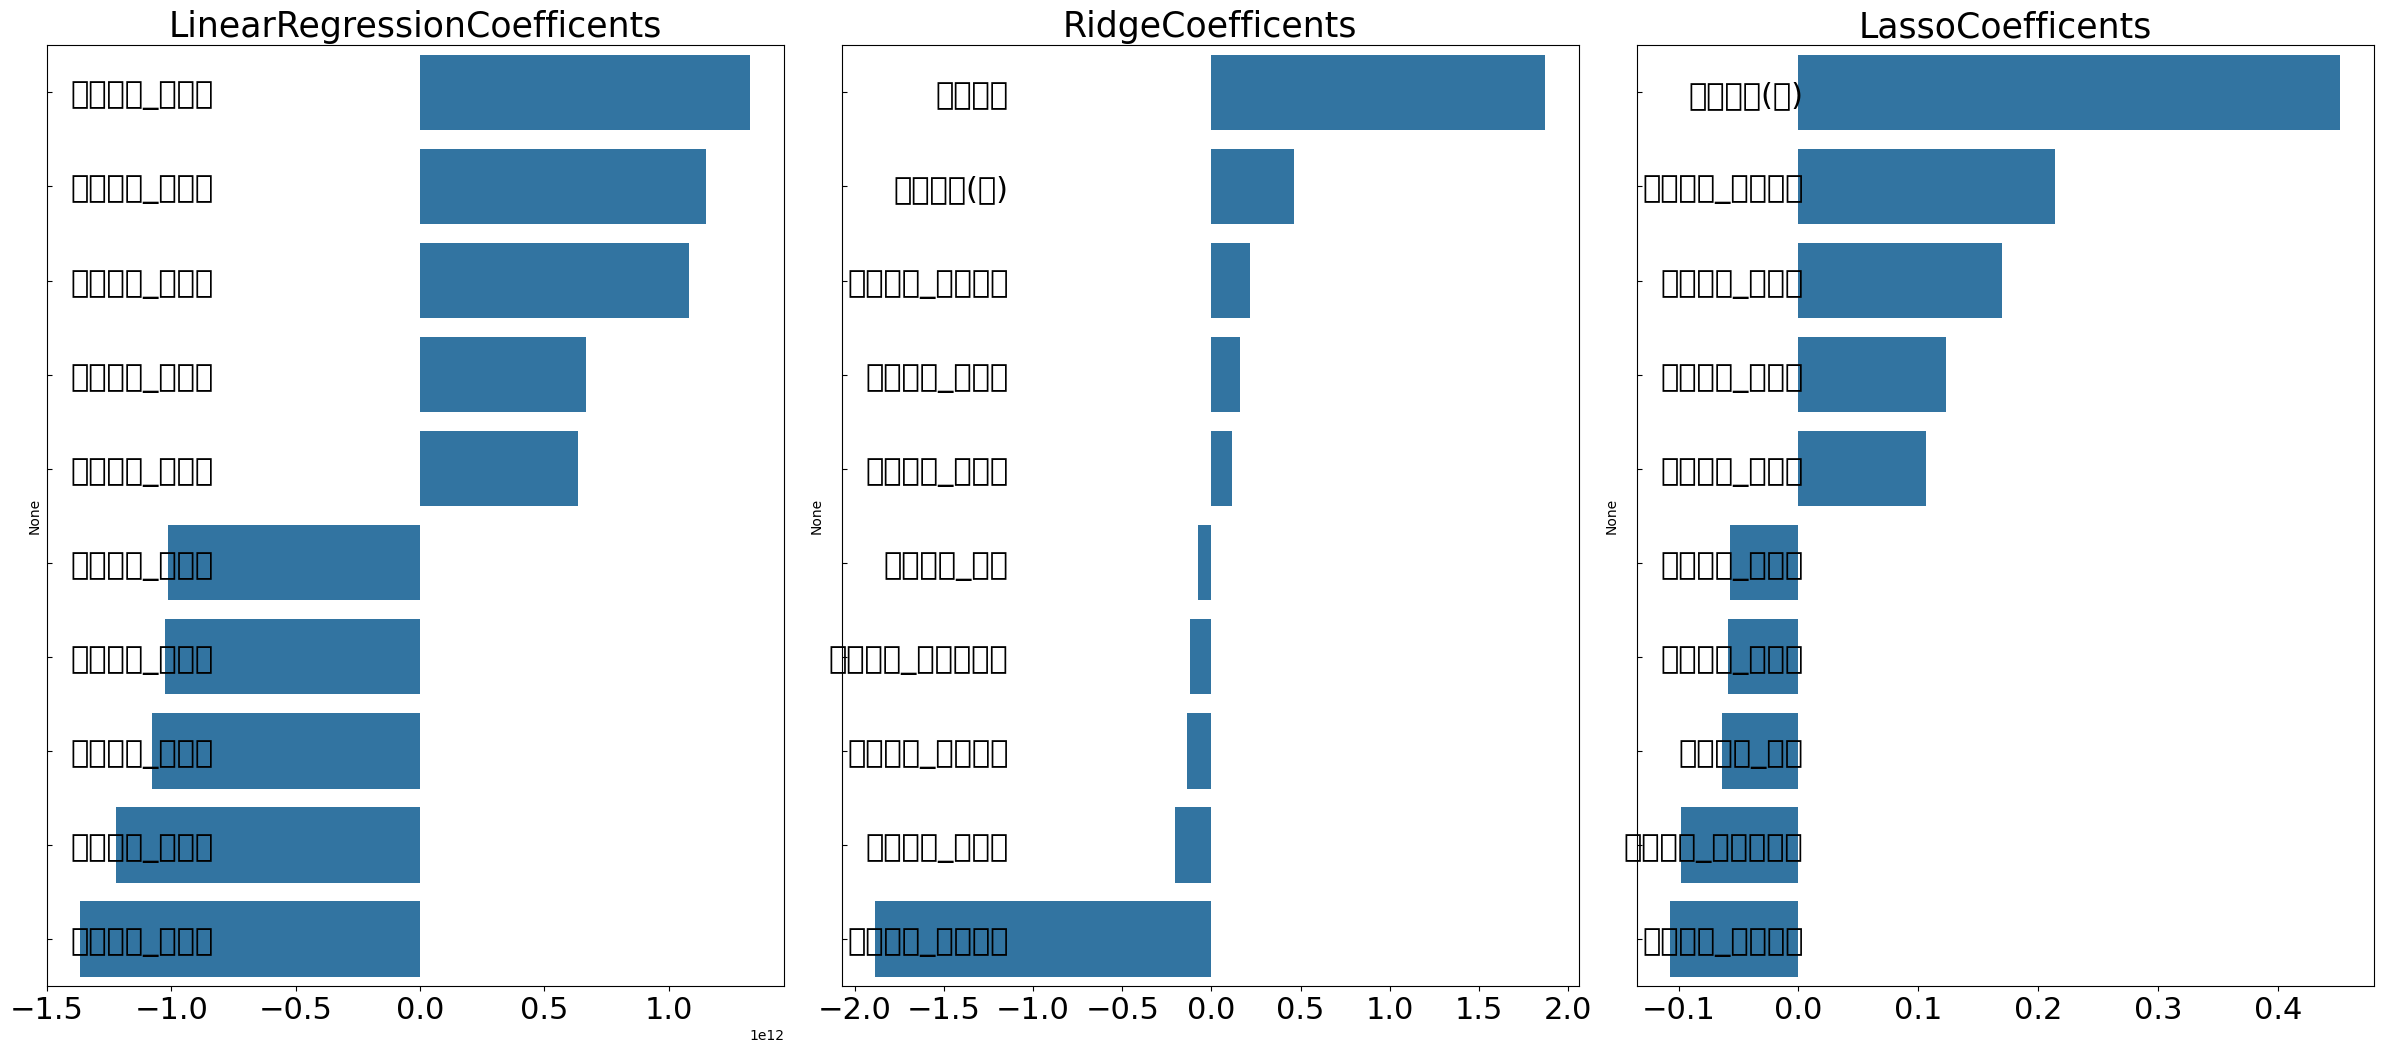

In [ ]:
# 하이퍼파라미터 최적화 alpha값 기반 학습데이터로 학습 후 테스트데이터로 예측 및 평가

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=0.05)       ## 최적alpha 결과값 대입 print_best_params(ridge_reg, ridge_params)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.005)    ## 최적alpha 결과값 대입 print_best_params(lasso_reg, lasso_params)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
data_df_cp_obj = data_df_cp.select_dtypes(exclude=['number'])
data_df_cp_obj.head(3)

,자치구명,법정동명,지번구분명,건물명,권리구분,건물용도,신고구분,브랜드명
0,광진구,자양동,대지,한양,정상거래,아파트,중개거래,기타
1,성북구,동선동5가,대지,현대빌라,정상거래,연립다세대,중개거래,기타
2,금천구,독산동,대지,금천롯데캐슬골드파크1차,정상거래,아파트,직거래,롯데캐슬


In [ ]:
data_df_cp_num= data_df_cp.select_dtypes(exclude='object')
data_df_cp_num.head(3)

,접수연도,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
0,2024,20241119,238000,157.870,0.0,2.0,0.0,1983.0
1,2024,20241119,25500,56.730,29.0,4.0,0.0,1994.0
2,2024,20241119,120000,84.811,0.0,26.0,0.0,2016.0


In [ ]:
data_df_cp_num = data_df_cp_num.drop(['접수연도'], axis=1)

In [ ]:
from scipy.stats import skew

skewness=data_df_cp_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

,0
토지면적(㎡),263.186880
취소일,4.702822
물건금액(만원),3.473089
층,1.472439
건물면적(㎡),1.086672
계약일,-6.264197
건축년도,-9.502028


In [ ]:
skewness_bad=skewness[abs(skewness)>0.5]

skewness_bad.sort_values(ascending=False)

,0
토지면적(㎡),263.186880
취소일,4.702822
물건금액(만원),3.473089
층,1.472439
건물면적(㎡),1.086672
계약일,-6.264197
건축년도,-9.502028


In [ ]:
skew_features=data_df_cp_num[skewness_bad.index]

In [ ]:
skew_features=np.log(skew_features +1)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [ ]:
sn=list(skewness.index)

In [ ]:
snb=list(skewness_bad.index)

In [ ]:
for i in sn:
  if i in snb:
    pass

  else:
    print(i)

In [ ]:
data_df_cp_obj = data_df_cp_obj.drop(['건물명'], axis=1)
data_df_cp_obj.head(3)

,자치구명,법정동명,지번구분명,권리구분,건물용도,신고구분,브랜드명
0,광진구,자양동,대지,정상거래,아파트,중개거래,기타
1,성북구,동선동5가,대지,정상거래,연립다세대,중개거래,기타
2,금천구,독산동,대지,정상거래,아파트,직거래,롯데캐슬


In [ ]:
data_df_cp_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78234 entries, 0 to 86543
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구명    78234 non-null  object
 1   법정동명    78234 non-null  object
 2   지번구분명   78234 non-null  object
 3   권리구분    78234 non-null  object
 4   건물용도    78234 non-null  object
 5   신고구분    78234 non-null  object
 6   브랜드명    78234 non-null  object
dtypes: object(7)
memory usage: 6.8+ MB


In [ ]:
# object 컬럼들은 현재 카테코리형으로 확인이 되어 따로 분리 없이 바로 인코딩 진행
data_df_cp_obj = pd.get_dummies(data_df_cp_obj, columns = ['자치구명','법정동명','지번구분명','권리구분','건물용도','신고구분','브랜드명'], drop_first = True)
data_df_cp_obj.head(3)

,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명_가리봉동,법정동명_가산동,법정동명_가양동,법정동명_가회동,법정동명_갈월동,법정동명_갈현동,법정동명_강일동,법정동명_개봉동,법정동명_개포동,법정동명_개화동,법정동명_거여동,법정동명_견지동,법정동명_경운동,법정동명_계동,법정동명_고덕동,법정동명_고척동,법정동명_공덕동,법정동명_공릉동,법정동명_공항동,법정동명_관수동,법정동명_관철동,법정동명_광장동,법정동명_광희동1가,법정동명_교북동,법정동명_구기동,법정동명_구로동,법정동명_구산동,법정동명_구수동,법정동명_구의동,법정동명_군자동,법정동명_궁동,법정동명_금호동1가,법정동명_금호동2가,법정동명_금호동3가,법정동명_금호동4가,법정동명_길동,법정동명_길음동,법정동명_낙원동,법정동명_남가좌동,법정동명_남대문로5가,법정동명_남창동,법정동명_남현동,법정동명_내곡동,법정동명_내발산동,법정동명_내수동,법정동명_냉천동,법정동명_노고산동,법정동명_노량진동,법정동명_녹번동,법정동명_논현동,법정동명_누상동,법정동명_누하동,법정동명_능동,법정동명_답십리동,법정동명_당산동,법정동명_당산동1가,법정동명_당산동2가,법정동명_당산동3가,법정동명_당산동4가,법정동명_당산동5가,법정동명_당산동6가,법정동명_당인동,법정동명_당주동,법정동명_대림동,법정동명_대방동,법정동명_대신동,법정동명_대조동,법정동명_대치동,법정동명_대현동,법정동명_대흥동,법정동명_도곡동,법정동명_도림동,법정동명_도봉동,법정동명_도선동,법정동명_도원동,법정동명_도화동,법정동명_독산동,법정동명_돈암동,법정동명_돈의동,법정동명_동교동,법정동명_동빙고동,법정동명_동선동1가,법정동명_동선동3가,법정동명_동선동4가,법정동명_동선동5가,법정동명_동소문동4가,법정동명_동소문동5가,법정동명_동소문동6가,법정동명_동소문동7가,법정동명_동숭동,법정동명_동자동,법정동명_동작동,법정동명_둔촌동,법정동명_등촌동,법정동명_마곡동,법정동명_마장동,법정동명_마천동,법정동명_마포동,법정동명_만리동1가,법정동명_만리동2가,법정동명_망우동,법정동명_망원동,법정동명_면목동,법정동명_명륜1가,법정동명_명륜2가,법정동명_명륜3가,법정동명_명일동,법정동명_목동,법정동명_무악동,법정동명_묵동,법정동명_묵정동,법정동명_문래동1가,법정동명_문래동2가,법정동명_문래동3가,법정동명_문래동4가,법정동명_문래동5가,법정동명_문래동6가,법정동명_문배동,법정동명_문정동,법정동명_미아동,법정동명_반포동,법정동명_방배동,법정동명_방이동,법정동명_방학동,법정동명_방화동,법정동명_번동,법정동명_보광동,법정동명_보문동1가,법정동명_보문동2가,법정동명_보문동3가,법정동명_보문동4가,법정동명_보문동5가,법정동명_보문동6가,법정동명_보문동7가,법정동명_본동,법정동명_봉천동,법정동명_부암동,법정동명_북가좌동,법정동명_북아현동,법정동명_불광동,법정동명_사근동,법정동명_사당동,법정동명_사직동,법정동명_산천동,법정동명_삼선동1가,법정동명_삼선동2가,법정동명_삼선동3가,법정동명_삼선동4가,법정동명_삼선동5가,법정동명_삼성동,법정동명_삼전동,법정동명_삼청동,법정동명_상계동,법정동명_상도1동,법정동명_상도동,법정동명_상봉동,법정동명_상수동,법정동명_상암동,법정동명_상왕십리동,법정동명_상월곡동,법정동명_상일동,법정동명_서계동,법정동명_서교동,법정동명_서빙고동,법정동명_서초동,법정동명_석관동,법정동명_석촌동,법정동명_성내동,법정동명_성북동,법정동명_성북동1가,법정동명_성산동,법정동명_성수동1가,법정동명_성수동2가,법정동명_세곡동,법정동명_송정동,법정동명_송파동,법정동명_수색동,법정동명_수서동,법정동명_수송동,법정동명_수유동,법정동명_순화동,법정동명_숭인동,법정동명_시흥동,법정동명_신계동,법정동명_신공덕동,법정동명_신교동,법정동명_신길동,법정동명_신내동,법정동명_신당동,법정동명_신대방동,법정동명_신도림동,법정동명_신림동,법정동명_신문로1가,법정동명_신문로2가,법정동명_신사동,법정동명_신설동,법정동명_신수동,법정동명_신영동,법정동명_신원동,법정동명_신월동,법정동명_신정동,법정동명_신창동,법정동명_신천동,법정동명_신촌동,법정동명_쌍문동,법정동명_아현동,법정동명_안암동1가,법정동명_안암동3가,법정동명_안암동4가,법정동명_안암동5가,법정동명_암사동,법정동명_압구정동,법정동명_양재동,법정동명_양평동1가,법정동명_양평동2가,법정동명_양평동3가,법정동명_양평동4가,법정동명_양평동5가,법정동명_양평동6가,법정동명_여의도동,법정동명_역삼동,법정동명_역촌동,법정동명_연건동,법정동명_연남동,법정동명_연지동,법정동명_연희동,법정동명_염곡동,법정동명_염리동,법정동명_염창동,법정동명_영등포동,법정동명_영등포동1가,법정동명_영등포동2가,법정동명_영등포동3가,법정동명_영등포동4가,법정동명_영등포동5가,법정동명_영등포동6가,법정동명_영등포동7가,법정동명_영등포동8가,법정동명_영천동,법정동명_예장동,법정동명_오금동,법정동명_오류동,법정동명_오장동,법정동명_옥수동,법정동명_옥인동,법정동명_옥천동,법정동명_온수동,법정동명_외발산동,법정동명_용강동,법정동명_용답동,법정동명_용두동,법정동명_용문동,법정동명_용산동2가,법정동명_용산동3가,법정동명_용산동5가,법정동명_우면동,법정동명_우이동,법정동명_원남동,법정동명_원서동,법정동명_원효로1가,법정동명_원효로2가,법정동명_원효로3가,법정동명_원효로4가,법정동명_월계동,법정동명_율현동,법정동명_을지로2가,법정동명_을지로3가,법정동명_을지로4가,법정동명_을지로5가,법정동명_을지로6가,법정동명_응봉동,법정동명_응암동,법정동명_의주로1가,법정동명_이문동,법정동명_이촌동,법정동명_이태원동,법정동명_이화동,법정동명_익선동,법정동명_인의동,법정동명_인현동2가,법정동명_일원동,법정동명_입정동,법정동명_자곡동,법정동명_자양동,법정동명_잠실동,법정동명_잠원동,법정동명_장안동,법정동명_장위동,법정동명_장지동,법정동명_장충동1가,법정동명_장충동2가,법정동명_저동2가,법정동명_적선동,법정동명_전농동,법정동명_정동,법정동명_정릉동,법정동명_제기동,법정동명_종로1가,법정동명_종로5가,법정동명_종암동,법정동명_주성동,법정동명_중계동,법정동명_중곡동,법정동명_중동,법정동명_중림동,법정동명_중화동,법정동명_증산동,법정동명_진관동,법정동명_창동,법정동명_창신동,법정동명_창전동,법정동명_창천동,법정동명_천연동,법정동명_천왕동,법정동명_천호동,법정동명_청담동,법정동명_청량리동,법정동명_청암동,법정동명_청운동,법정동명_청파동1가,법정동명_청파동2가,법정동명_청파동3가,법정동명_체부동,법정동명_충무로2가,법정동명_충무로3가,법정동명_충무로4가,법정동명_충무로5가,법정동명_충신동,법정동명_충정로2가,법정동명_충정로3가,법정동명_토정동,법정동명_통인동,법정동명_평동,법정동명_평창동,법정동명_풍납동,법정동명_필동1가,법정동명_필동2가,법정동명_필동3가,법정동명_필운동,법정동명_하계동,법정동명_하왕십리동,법정동명_하월곡동,법정동명_하중동,법정동명_한강로1가,법정동명_한강로2가,법정동명_한강로3가,법정동명_한남동,법정동명_합동,법정동명_합정동,법정동명_항동,법정동명_행당동,법정동명_행촌동,법정동명_현석동,법정동명_현저동,법정동명_혜화동,법정동명_홍은동,법정동명_홍익동,법정동명_홍제동,법정동명_홍지동,법정동명_홍파동,법정동명_화곡동,법정동명_화양동,법정동명_황학동,법정동명_회기동,법정동명_회현동1가,법정동명_회현동2가,법정동명_효자동,법정동명_효제동,법정동명_효창동,법정동명_후암동,법정동명_휘경동,법정동명_흑석동,법정동명_흥인동,지번구분명_블럭,지번구분명_산,권리구분_입주권,권리구분_정상거래,건물용도_연립다세대,건물용도_오피스텔,신고구분_직거래,브랜드명_기타,브랜드명_더샵,브랜드명_더플래티넘,브랜드명_데시앙,브랜드명_동문굿모닝,브랜드명_래미안,브랜드명_롯데캐슬,브랜드명_리슈빌,브랜드명_벽산블루밍,브랜드명_서희스타힐스,브랜드명_센트레빌,브랜드명_수자인,브랜드명_스위첸,브랜드명_아이파크,브랜

In [ ]:
data_df_cp_obj.shape

(78234, 425)

In [ ]:
data_df_cp_new=pd.merge(data_df_cp_obj,skew_features,left_index=True,right_index=True)

In [ ]:
data_df_cp_new

,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명_가리봉동,법정동명_가산동,법정동명_가양동,법정동명_가회동,법정동명_갈월동,법정동명_갈현동,법정동명_강일동,법정동명_개봉동,법정동명_개포동,법정동명_개화동,법정동명_거여동,법정동명_견지동,법정동명_경운동,법정동명_계동,법정동명_고덕동,법정동명_고척동,법정동명_공덕동,법정동명_공릉동,법정동명_공항동,법정동명_관수동,법정동명_관철동,법정동명_광장동,법정동명_광희동1가,법정동명_교북동,법정동명_구기동,법정동명_구로동,법정동명_구산동,법정동명_구수동,법정동명_구의동,법정동명_군자동,법정동명_궁동,법정동명_금호동1가,법정동명_금호동2가,법정동명_금호동3가,법정동명_금호동4가,법정동명_길동,법정동명_길음동,법정동명_낙원동,법정동명_남가좌동,법정동명_남대문로5가,법정동명_남창동,법정동명_남현동,법정동명_내곡동,법정동명_내발산동,법정동명_내수동,법정동명_냉천동,법정동명_노고산동,법정동명_노량진동,법정동명_녹번동,법정동명_논현동,법정동명_누상동,법정동명_누하동,법정동명_능동,법정동명_답십리동,법정동명_당산동,법정동명_당산동1가,법정동명_당산동2가,법정동명_당산동3가,법정동명_당산동4가,법정동명_당산동5가,법정동명_당산동6가,법정동명_당인동,법정동명_당주동,법정동명_대림동,법정동명_대방동,법정동명_대신동,법정동명_대조동,법정동명_대치동,법정동명_대현동,법정동명_대흥동,법정동명_도곡동,법정동명_도림동,법정동명_도봉동,법정동명_도선동,법정동명_도원동,법정동명_도화동,법정동명_독산동,법정동명_돈암동,법정동명_돈의동,법정동명_동교동,법정동명_동빙고동,법정동명_동선동1가,법정동명_동선동3가,법정동명_동선동4가,법정동명_동선동5가,법정동명_동소문동4가,법정동명_동소문동5가,법정동명_동소문동6가,법정동명_동소문동7가,법정동명_동숭동,법정동명_동자동,법정동명_동작동,법정동명_둔촌동,법정동명_등촌동,법정동명_마곡동,법정동명_마장동,법정동명_마천동,법정동명_마포동,법정동명_만리동1가,법정동명_만리동2가,법정동명_망우동,법정동명_망원동,법정동명_면목동,법정동명_명륜1가,법정동명_명륜2가,법정동명_명륜3가,법정동명_명일동,법정동명_목동,법정동명_무악동,법정동명_묵동,법정동명_묵정동,법정동명_문래동1가,법정동명_문래동2가,법정동명_문래동3가,법정동명_문래동4가,법정동명_문래동5가,법정동명_문래동6가,법정동명_문배동,법정동명_문정동,법정동명_미아동,법정동명_반포동,법정동명_방배동,법정동명_방이동,법정동명_방학동,법정동명_방화동,법정동명_번동,법정동명_보광동,법정동명_보문동1가,법정동명_보문동2가,법정동명_보문동3가,법정동명_보문동4가,법정동명_보문동5가,법정동명_보문동6가,법정동명_보문동7가,법정동명_본동,법정동명_봉천동,법정동명_부암동,법정동명_북가좌동,법정동명_북아현동,법정동명_불광동,법정동명_사근동,법정동명_사당동,법정동명_사직동,법정동명_산천동,법정동명_삼선동1가,법정동명_삼선동2가,법정동명_삼선동3가,법정동명_삼선동4가,법정동명_삼선동5가,법정동명_삼성동,법정동명_삼전동,법정동명_삼청동,법정동명_상계동,법정동명_상도1동,법정동명_상도동,법정동명_상봉동,법정동명_상수동,법정동명_상암동,법정동명_상왕십리동,법정동명_상월곡동,법정동명_상일동,법정동명_서계동,법정동명_서교동,법정동명_서빙고동,법정동명_서초동,법정동명_석관동,법정동명_석촌동,법정동명_성내동,법정동명_성북동,법정동명_성북동1가,법정동명_성산동,법정동명_성수동1가,법정동명_성수동2가,법정동명_세곡동,법정동명_송정동,법정동명_송파동,법정동명_수색동,법정동명_수서동,법정동명_수송동,법정동명_수유동,법정동명_순화동,법정동명_숭인동,법정동명_시흥동,법정동명_신계동,법정동명_신공덕동,법정동명_신교동,법정동명_신길동,법정동명_신내동,법정동명_신당동,법정동명_신대방동,법정동명_신도림동,법정동명_신림동,법정동명_신문로1가,법정동명_신문로2가,법정동명_신사동,법정동명_신설동,법정동명_신수동,법정동명_신영동,법정동명_신원동,법정동명_신월동,법정동명_신정동,법정동명_신창동,법정동명_신천동,법정동명_신촌동,법정동명_쌍문동,법정동명_아현동,법정동명_안암동1가,법정동명_안암동3가,법정동명_안암동4가,법정동명_안암동5가,법정동명_암사동,법정동명_압구정동,법정동명_양재동,법정동명_양평동1가,법정동명_양평동2가,법정동명_양평동3가,법정동명_양평동4가,법정동명_양평동5가,법정동명_양평동6가,법정동명_여의도동,법정동명_역삼동,법정동명_역촌동,법정동명_연건동,법정동명_연남동,법정동명_연지동,법정동명_연희동,법정동명_염곡동,법정동명_염리동,법정동명_염창동,법정동명_영등포동,법정동명_영등포동1가,법정동명_영등포동2가,법정동명_영등포동3가,법정동명_영등포동4가,법정동명_영등포동5가,법정동명_영등포동6가,법정동명_영등포동7가,법정동명_영등포동8가,법정동명_영천동,법정동명_예장동,법정동명_오금동,법정동명_오류동,법정동명_오장동,법정동명_옥수동,법정동명_옥인동,법정동명_옥천동,법정동명_온수동,법정동명_외발산동,법정동명_용강동,법정동명_용답동,법정동명_용두동,법정동명_용문동,법정동명_용산동2가,법정동명_용산동3가,법정동명_용산동5가,법정동명_우면동,법정동명_우이동,법정동명_원남동,법정동명_원서동,법정동명_원효로1가,법정동명_원효로2가,법정동명_원효로3가,법정동명_원효로4가,법정동명_월계동,법정동명_율현동,법정동명_을지로2가,법정동명_을지로3가,법정동명_을지로4가,법정동명_을지로5가,법정동명_을지로6가,법정동명_응봉동,법정동명_응암동,법정동명_의주로1가,법정동명_이문동,법정동명_이촌동,법정동명_이태원동,법정동명_이화동,법정동명_익선동,법정동명_인의동,법정동명_인현동2가,법정동명_일원동,법정동명_입정동,법정동명_자곡동,법정동명_자양동,법정동명_잠실동,법정동명_잠원동,법정동명_장안동,법정동명_장위동,법정동명_장지동,법정동명_장충동1가,법정동명_장충동2가,법정동명_저동2가,법정동명_적선동,법정동명_전농동,법정동명_정동,법정동명_정릉동,법정동명_제기동,법정동명_종로1가,법정동명_종로5가,법정동명_종암동,법정동명_주성동,법정동명_중계동,법정동명_중곡동,법정동명_중동,법정동명_중림동,법정동명_중화동,법정동명_증산동,법정동명_진관동,법정동명_창동,법정동명_창신동,법정동명_창전동,법정동명_창천동,법정동명_천연동,법정동명_천왕동,법정동명_천호동,법정동명_청담동,법정동명_청량리동,법정동명_청암동,법정동명_청운동,법정동명_청파동1가,법정동명_청파동2가,법정동명_청파동3가,법정동명_체부동,법정동명_충무로2가,법정동명_충무로3가,법정동명_충무로4가,법정동명_충무로5가,법정동명_충신동,법정동명_충정로2가,법정동명_충정로3가,법정동명_토정동,법정동명_통인동,법정동명_평동,법정동명_평창동,법정동명_풍납동,법정동명_필동1가,법정동명_필동2가,법정동명_필동3가,법정동명_필운동,법정동명_하계동,법정동명_하왕십리동,법정동명_하월곡동,법정동명_하중동,법정동명_한강로1가,법정동명_한강로2가,법정동명_한강로3가,법정동명_한남동,법정동명_합동,법정동명_합정동,법정동명_항동,법정동명_행당동,법정동명_행촌동,법정동명_현석동,법정동명_현저동,법정동명_혜화동,법정동명_홍은동,법정동명_홍익동,법정동명_홍제동,법정동명_홍지동,법정동명_홍파동,법정동명_화곡동,법정동명_화양동,법정동명_황학동,법정동명_회기동,법정동명_회현동1가,법정동명_회현동2가,법정동명_효자동,법정동명_효제동,법정동명_효창동,법정동명_후암동,법정동명_휘경동,법정동명_흑석동,법정동명_흥인동,지번구분명_블럭,지번구분명_산,권리구분_입주권,권리구분_정상거래,건물용도_연립다세대,건물용도_오피스텔,신고구분_직거래,브랜드명_기타,브랜드명_더샵,브랜드명_더플래티넘,브랜드명_데시앙,브랜드명_동문굿모닝,브랜드명_래미안,브랜드명_롯데캐슬,브랜드명_리슈빌,브랜드명_벽산블루밍,브랜드명_서희스타힐스,브랜드명_센트레빌,브랜드명_수자인,브랜드명_스위첸,브랜드명_아이파크,브랜

In [ ]:
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test , pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__, '로그 변환된 RMSE:' , np.round(rmse,3))
  return rmse

In [ ]:
def get_rmses(models):
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [ ]:
data_df_cp_new.isna().sum()

,0
자치구명_강동구,0
자치구명_강북구,0
자치구명_강서구,0
자치구명_관악구,0
자치구명_광진구,0
...,...
건물면적(㎡),0
토지면적(㎡),0
층,7
취소일,0


In [ ]:
data_df_cp_new.dropna(subset= ['층'], inplace=True)

In [ ]:
# NumPy 배열에서 확인
print(np.isinf(data_df_cp_new).any())  # 무한대 값이 있는지 확인
print(np.isnan(data_df_cp_new).any())  # NaN 값이 있는지 확인

# Pandas 데이터프레임에서 확인
print(data_df_cp_new.isin([np.inf, -np.inf]).any().any())  # 무한대 값이 있는지 확인
print(data_df_cp_new.isna().any().any())  # NaN 값이 있는지 확인

자치구명_강동구    False
자치구명_강북구    False
자치구명_강서구    False
자치구명_관악구    False
자치구명_광진구    False
            ...  
건물면적(㎡)     False
토지면적(㎡)     False
층            True
취소일         False
건축년도        False
Length: 432, dtype: bool
자치구명_강동구    False
자치구명_강북구    False
자치구명_강서구    False
자치구명_관악구    False
자치구명_광진구    False
            ...  
건물면적(㎡)     False
토지면적(㎡)     False
층           False
취소일         False
건축년도        False
Length: 432, dtype: bool
True
False


In [ ]:
# NumPy
data_df_cp_new[np.isinf(data_df_cp_new)] = np.nan  # 무한대 값을 NaN으로 대체

# Pandas
data_df_cp_new.replace([np.inf, -np.inf], np.nan, inplace=True)

data_df_cp_new.isna().sum()

,0
자치구명_강동구,0
자치구명_강북구,0
자치구명_강서구,0
자치구명_관악구,0
자치구명_광진구,0
...,...
건물면적(㎡),0
토지면적(㎡),0
층,1308
취소일,0


In [ ]:
data_df_cp_new.dropna(subset= ['층'], inplace=True)

In [ ]:
data_df_cp_new[data_df_cp_new >= 1.8 * 10 ** 308].count()

,0
자치구명_강동구,0
자치구명_강북구,0
자치구명_강서구,0
자치구명_관악구,0
자치구명_광진구,0
...,...
건물면적(㎡),0
토지면적(㎡),0
층,0
취소일,0


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=data_df_cp_new['물건금액(만원)']
X_features=data_df_cp_new.drop('물건금액(만원)',axis=1,inplace=False)

X_train , X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 17694523.674
Ridge 로그 변환된 RMSE: 0.289
Lasso 로그 변환된 RMSE: 0.845


[17694523.673648465, 0.28875255411269585, 0.8448435826952277]

In [ ]:
from xgboost import XGBRegressor
model= XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import numpy as np
from sklearn.metrics import make_scorer
def rmse(p,a):
    difference=p-a
    squared =difference**2
    mean=squared.mean()
    score=np.sqrt(mean)
    return score

rmse_scorer=make_scorer(rmse,greater_is_better=False)
rmse_scorer

make_scorer(rmse, greater_is_better=False, response_method='predict')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters={
# 'max_depth':[1,3,5,7,9],
# 'learning_rate':[0.01,0.03,0.05,0.07,0.09]
# }

# GS=GridSearchCV(model,param_grid=parameters,cv=20,scoring=rmse_scorer)
# GS.fit(X_train, y_train)

In [ ]:
from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=100,max_depth=9  ,learning_rate=0.09   ,random_state=7, n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=7, ...)

In [ ]:
log_prediction = model.predict(X_test)
print(log_prediction.shape)

(15384,)


In [ ]:
prediction=np.exp(log_prediction)-1
print(prediction.shape)

(15384,)
